# Questions for EDA
## Name:Vaibhav Saran
## UB ID:50615031
### Q1: **What is the relationship between RAM size and laptop prices? Does this relationship hold consistent across different brands and platforms (Amazon, Flipkart, BestBuy)?**

#### Why is this question significant to the objective?
Understanding the relationship between RAM size and laptop prices is critical for both **sellers** and **customers**. RAM is one of the most important specifications that directly impacts a laptop's performance, and customers often prioritize this feature when making purchasing decisions. By analyzing how RAM size influences prices across different brands and platforms, the following objectives are addressed:

- **For sellers**: This insight helps sellers determine **optimal pricing strategies** by understanding how competitors across platforms (Amazon, Flipkart, BestBuy) price laptops with similar RAM capacities. If sellers understand that customers are willing to pay a premium for higher RAM sizes, they can adjust their pricing to meet demand or differentiate their product line accordingly. Additionally, it helps in identifying any pricing **outliers** or inconsistencies that may deter customers.
  
- **For customers**: This analysis provides potential buyers with valuable information about whether **higher RAM** truly justifies a higher price. Customers will be able to evaluate whether paying more for additional RAM gives them real value, helping them make better purchasing decisions.


---

### Q2: **Which processor company (Intel, AMD, etc.) dominates the market across different price ranges?**

#### Why is this question significant to the objective?
Processor brand and quality are key factors that strongly influence both **performance** and **price**. Customers tend to associate certain processor companies (like Intel or Apple) with performance, reliability, and price categories. By analyzing processor company dominance across different price ranges, we address the project objectives:

- **For sellers**: This question helps sellers understand the **processor-brand positioning** in the market. If Intel dominates across most price ranges, sellers might decide to stock more Intel-based laptops. For companies like AMD or newer ARM-based processors (e.g., Qualcomm, MediaTek), understanding their **market penetration** in lower price brackets can inform whether sellers should diversify their offerings. Additionally, knowing that Apple caters more to high-end customers allows sellers to focus their high-end marketing strategies on Apple-based machines.
  
- **For customers**: Customers need to understand the **value for money** aspect when it comes to processors. If Intel is dominating a wide range of prices, buyers may have more confidence in purchasing Intel-based machines. Alternatively, if AMD is delivering strong performance at lower price points, it may sway customers towards purchasing AMD laptops. Understanding the relationship between processor company and price helps customers align their budget with their performance expectations.

---

### Conclusion:
Both questions are deeply aligned with the overarching objectives of understanding factors influencing laptop pricing and customer interest. By focusing on **RAM and processor dominance**, these questions allow us to uncover crucial insights about **performance-to-price trade-offs** and **market dynamics**. This information will help sellers optimize their offerings and pricing strategies, while also assisting customers in making informed purchasing decisions based on their budget and preferred features. These questions also reveal how certain brands and platforms (Amazon, Flipkart, BestBuy) cater to different price-sensitive and performance-focused markets.
## Name:Yeswanth Chitturi
## UB ID:50591666
## Question 1: 
**Which brand has more models in total and across platforms? What is the model with the highest price in each brand in total and across platforms?**
- **Connection to Objectives:** This question aims to identify the brand with the most extensive range of offerings. Understanding which brands dominate the market in terms of model variety is crucial for recognizing consumer choice patterns. Additionally, identifying the highest-priced models for each brand helps to highlight premium offerings that might attract consumers looking for quality.
- **Informed Decision-Making:** Customers can use this information to identify brands that offer a wider variety of models, helping them find options that better match their preferences and requirements.
- **Understanding Value:** Knowing which models are priced highest can help customers evaluate whether a higher price correlates with additional features or quality, guiding them towards products that provide better value for their money.
- **Market Positioning:** Sellers can use insights about brand model variety to adjust their product lines or marketing strategies, ensuring they offer competitive choices that meet customer demand.
- **Pricing Strategy:** Understanding which models command higher prices can help sellers identify premium features that justify the price, aiding in product positioning and marketing efforts.

- **Significance:** A brand with a larger number of models is likely to cater to a diverse range of customer needs, enhancing its market presence and competitiveness. Identifying the highest-priced models allows both sellers and consumers to understand what drives pricing and the features associated with premium offerings, thus informing better purchasing and marketing strategies.

## Question 2: 
**What are the varieties in screen sizes for all models across platforms? What are the average screen sizes for each brand? Which screen size has a better rating? What is the relation between RAM and storage with screen sizes?**
- **Connection to Objectives:** This question set explores the physical characteristics of laptops, particularly focusing on screen sizes, which is a critical factor influencing consumer preference. By analyzing the varieties in screen sizes, calculating average sizes per brand, and examining ratings associated with different sizes, this analysis addresses key customer requirements and perceptions. Furthermore, exploring the relationship between RAM, storage, and screen sizes provides insights into how specifications impact consumer satisfaction and performance expectations.
- **Personal Preference:** Customers can identify the variety of screen sizes available, allowing them to select a model that fits their use case, whether it’s for portability or a larger display for work and entertainment.
- **Quality Assurance:** Knowing which screen sizes have better ratings can help customers make informed choices about which laptops are likely to meet their needs and expectations for performance and usability.
- **Optimal Configuration:** Understanding the relationship between RAM, storage, and screen sizes can assist customers in selecting a configuration that maximizes performance based on their specific needs, such as gaming, content creation, or general use.
- **Product Development:** Insights into screen size preferences can guide sellers in designing and marketing laptops that cater to consumer needs, ensuring that they are meeting current trends in customer preferences.
- **Targeted Marketing:** By analyzing the relationship between RAM, storage, and screen sizes, sellers can create targeted marketing campaigns that highlight configurations that provide optimal performance for specific user demographics.
- **Inventory Management:** Understanding the variety and average screen sizes can aid sellers in managing inventory effectively, ensuring that they stock popular models that align with consumer demand.
- **Significance:** Screen size is often a significant consideration for consumers when purchasing laptops, impacting usability and overall experience. Understanding the variety and average sizes can guide manufacturers in product development, ensuring that offerings align with consumer demands. Additionally, examining the correlation between RAM, storage, and screen sizes can reveal insights into optimal configurations that meet user needs, thereby informing both product design and marketing strategies.

## Conclusion
The questions posed are not only significant in leading to the project's objectives but also provide valuable insights that can bridge the gap between consumer needs and seller offerings. By addressing these questions, the analysis aims to yield actionable insights that can enhance pricing strategies, product development, and ultimately assist consumers in making informed purchasing decisions.
## Name:Shaurya Mathur
## UB ID:50611201
### Question1
**How do the prices of laptops with similar specifications vary across brands?**

Why This Question Leads to Your Objectives:

This question directly addresses the core objective of your project: to understand pricing factors for laptops. By focusing on laptops with similar specifications (e.g., same RAM, storage, processor, screen size), you eliminate variables related to performance and hardware differences, allowing you to isolate the effect of brand on pricing.

Analyzing this question helps you identify whether certain brands charge a premium for similar specifications or if there are consistent pricing strategies that can be attributed to brand perception, customer loyalty, or even marketing approaches. It also reveals how brands position themselves in the market relative to their competitors, which is crucial for understanding the broader pricing landscape in the laptop market.

Why Is It a Significant Question?

- **Consumer Decision-Making:** This question provides valuable insights for consumers looking for the best value for their money. If two laptops with the same specifications are priced significantly differently across brands, consumers can better evaluate which brand offers the best deal.
- **Brand Premium and Market Positioning:** Brands often justify higher prices through brand reputation, build quality, customer support, or additional features not listed in the core specs. By answering this question, we can evaluate if certain brands are charging a premium and whether it’s justified, providing a clearer picture of brand value.
- **Retail and Brand Strategies:** For retailers and brands, understanding how competitors price laptops with similar specifications is crucial for setting competitive prices. This analysis can help brands adjust their pricing strategy to better position themselves in the market and increase sales.
- **Recommendation Engine Optimization:** The insights from this question are fundamental to building a recommendation engine. If some brands consistently offer better value for the same specifications, the engine can factor that into its suggestions, ensuring consumers get the best deal for their preferences.


### Question2
**What are the major types of Storage? How does a product's prices vary with different types of storages?**

Why This Question Leads to Your Objectives:

This question is key to understanding how specific laptop features, in this case, storage type, influence the pricing of laptops. Storage is a significant hardware component that impacts both the performance and price of a laptop. By analyzing this, you can achieve the objective of identifying which specifications contribute most to a laptop’s price variation.

The question aims to explore the relationship between storage types (e.g., HDD, SSD, NVMe) and pricing trends across different brands and retail platforms. It leads you toward a deeper understanding of how storage influences overall laptop pricing, which is a crucial factor for both consumers and brands.

Why Is It a Significant Question?

- **Consumer Preferences:** For many consumers, storage type is a major consideration when purchasing a laptop. SSDs and NVMe drives, known for their speed, often command higher prices than traditional HDDs. This question helps consumers understand whether they should be paying more for specific storage types and if those prices vary significantly across brands or platforms.
- **Impact on Pricing:** Storage types have a direct impact on a laptop’s price. For instance, SSDs are faster but more expensive than HDDs, while NVMe drives offer even faster speeds at a higher cost. Understanding how much of a price difference storage types cause is crucial for consumers looking for performance gains without overpaying. It also helps to identify if certain brands or platforms overprice laptops with higher storage options.
- **Market and Retail Strategy:** For brands and retailers, understanding how storage type influences pricing helps in product positioning and marketing. If certain storage options consistently drive up prices, brands can highlight those features in advertising or use them as a selling point for higher-end models. Retailers can use this data to guide promotions or recommendations for products with different storage types.
- **Product Segmentation:** Storage is often a feature that differentiates laptop models, even within the same series. By analyzing storage types and their impact on prices, the analysis will help segment laptops into different price ranges, catering to both budget-conscious and performance-focused customers.
- **Enhancing the Recommendation Engine:** Knowing how storage type affects prices will be essential for fine-tuning the recommendation engine. By understanding which storage types offer better performance-to-price ratios, the engine can suggest laptops that provide the best balance between storage capacity, speed, and cost, ensuring more accurate recommendations for consumers.

Conclusion:

This question is significant because it helps dissect one of the most important specifications affecting laptop performance and pricing. By exploring the price differences between laptops with HDD, SSD, and NVMe storage, you will provide insights into the value for money each storage type offers, contributing to your broader goal of understanding the factors influencing laptop pricing and consumer interest.

# 1. Importing Libraries

In [1]:
import numpy as np
from IPython.display import display
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 2. Loading the Dataset from Database

In [2]:
# Connect to SQLite database
conn = sqlite3.connect(r'database\laptrack.db')

# Read data from SQLite table into a DataFrame
df = pd.read_sql_query("SELECT * FROM Laptop_Ver_1", conn)

# Close the connection
conn.close()

df.head()

,Laptop_Brand,Laptop_Name,Processor_Company,Operating_System,Processor,Number_of_Reviews,Price,Storage_Type,Storage,Rating,Screen_Size,RAM,Source
0,ZHAOHUIXIN,PC1068,Alwinner,Android,1.8 GHz a13,1,119.99,EMMC,64,4.5,10.1,2,Amazon
1,TPV,AceBook,Intel,Windows 11 Pro,Core i5,13,309.99,SSD,512,4.5,15.6,16,Amazon
2,HP,Elitebook,Intel,Windows 11 Pro,Intel Core i7,5,1079,SSD,2048,4,16.0,32,Amazon
3,Apple,MacBook Air,Apple,Mac OS,Apple M3,0,929,SSD,256,4,13.6,8,Amazon
4,Apple,MacBook Air,Apple,Mac OS,Apple M3,0,1449,SSD,512,4,15.3,16,Amazon


# 3. Exploratory Data Analysis

## 3.1 Exploring the Meta Data information

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4838 entries, 0 to 4837
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Laptop_Brand       4838 non-null   object 
 1   Laptop_Name        4838 non-null   object 
 2   Processor_Company  4838 non-null   object 
 3   Operating_System   4838 non-null   object 
 4   Processor          4838 non-null   object 
 5   Number_of_Reviews  4838 non-null   int64  
 6   Price              4838 non-null   object 
 7   Storage_Type       4838 non-null   object 
 8   Storage            4838 non-null   object 
 9   Rating             4836 non-null   object 
 10  Screen_Size        4838 non-null   float64
 11  RAM                4838 non-null   int64  
 12  Source             4838 non-null   object 
dtypes: float64(1), int64(2), object(10)
memory usage: 491.5+ KB


### Observation
- There are only 2 null values in rating, which will be handled later.
- The data type for the column: `Rating`, `Storage`, `Price` are in object which needs to be changed to numbers(or appropriate datatype).

In [4]:
# Strip leading and trailing spaces from each category in 'Processor_Company'
df['Processor_Company'] = df['Processor_Company'].str.strip()

# Display the updated DataFrame to verify
print(df['Processor_Company'].unique())

['Alwinner' 'Intel' 'Apple' 'AMD' 'MediaTek' 'ARM' 'Qualcomm' 'Chromebook'
 'Snapdragon' 'AMD Ryzen' 'No Info' 'AMD\xa0Ryzen']


In [5]:
# Replace 'AMD\xa0Ryzen' with 'AMD Ryzen'
df['Processor_Company'] = df['Processor_Company'].str.replace('\xa0', ' ', regex=False)

# Display the updated DataFrame to verify the changes
print(df['Processor_Company'].unique())

['Alwinner' 'Intel' 'Apple' 'AMD' 'MediaTek' 'ARM' 'Qualcomm' 'Chromebook'
 'Snapdragon' 'AMD Ryzen' 'No Info']


In [6]:
# Looking at the unique values in Rating Storage and Price to see if there are any wrong values
cols = ["Rating","Storage","Price"]

for feature in cols:
    print("Unique values in",feature,":",df[feature].unique())
    print()

Unique values in Rating : ['4.5' '4' '4.3' '4.4' '4.6' '4.1' '4.2' '3.8' '3.4' '1' '5' '3' '3.9'
 '4.7' '3.5' '2.6' '3.7' '3.3' '3.6' '4.8' None '0' '4.9' '0 Reviews' '2'
 '2.7' '3.2' '2.5' '2.2' '2.8' '2.4' '1.7' '2.9' '2.3' '1.5']

Unique values in Storage : ['64' '512' '2048' '256' '128' '8192' '4096' '1000' '32' '16' '4' '640'
 '250' '500' '192' '320' '2' '1048576' '16384' '576' '1024' '64eMMC'
 '128eMMC' '128GeMMC' '128UFS' '512PCIe' '256UFS' '32eMMC' '750']

Unique values in Price : ['119.99' '309.99' '1079' ... '3149.99' '589.99' '4149.99']



In [7]:
# Handling above values by extracting numbers
df['Storage'] = df['Storage'].str.extract('(\d+)', expand=False)

df['Rating'] = df['Rating'].str.replace(' Reviews', '', regex=False)
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

df['Price'] = pd.to_numeric(df['Price'], errors='coerce')



In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4838 entries, 0 to 4837
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Laptop_Brand       4838 non-null   object 
 1   Laptop_Name        4838 non-null   object 
 2   Processor_Company  4838 non-null   object 
 3   Operating_System   4838 non-null   object 
 4   Processor          4838 non-null   object 
 5   Number_of_Reviews  4838 non-null   int64  
 6   Price              4817 non-null   float64
 7   Storage_Type       4838 non-null   object 
 8   Storage            4838 non-null   object 
 9   Rating             4836 non-null   float64
 10  Screen_Size        4838 non-null   float64
 11  RAM                4838 non-null   int64  
 12  Source             4838 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 491.5+ KB


### Observation
- All the columns are now in correct data format.
- Since the number of null values are very small the data will be dropped.

In [9]:
# Dropping Null values
df.dropna(inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4815 entries, 0 to 4837
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Laptop_Brand       4815 non-null   object 
 1   Laptop_Name        4815 non-null   object 
 2   Processor_Company  4815 non-null   object 
 3   Operating_System   4815 non-null   object 
 4   Processor          4815 non-null   object 
 5   Number_of_Reviews  4815 non-null   int64  
 6   Price              4815 non-null   float64
 7   Storage_Type       4815 non-null   object 
 8   Storage            4815 non-null   object 
 9   Rating             4815 non-null   float64
 10  Screen_Size        4815 non-null   float64
 11  RAM                4815 non-null   int64  
 12  Source             4815 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 526.6+ KB


In [10]:
# Percent of data loss
loss_per = (4838 - 4815)/4838
loss_per*=100
print("The total data loss (in %) is:",loss_per)

The total data loss (in %) is: 0.475403059115337


In [11]:
# Analyzing the laptop brands
df["Laptop_Brand"].unique()

array(['ZHAOHUIXIN', 'TPV', 'HP', 'Apple', 'Lenovo', 'ASUS', 'acer',
       'Dell', 'MSI', 'Zuleisy', 'Molegar', 'HEWLETT PACKARD',
       'Oemgenuine', 'ACEMAGIC', 'SGIN', 'SAIWAN', 'jumper', 'Microsoft',
       'ApoloSign', 'ist computers', 'SAMSUNG', 'Hp', 'FUNYET', 'Naclud',
       'BiTECOOL', 'NIAKUN', 'Samsung', 'WIPEMIK', 'Lapbook', 'Alienware',
       'LG', 'AimCare', 'Harry Potter', 'KOOFORWAY', 'Razer', 'Panasonic',
       'ZENAERO', 'INHONLAP', 'Maxsignage', 'CHUWI', 'ApoloMedia',
       'LETSUNG', 'VAIZMOYE', 'hp', 'KOOSMILE', 'VGKE', 'ANPCOWER',
       'GIGABYTE', 'EXCaliberPC', 'EYY', 'Morostron', 'AOC', 'Nmybwo',
       'Coolby', 'THKGRCE', 'Acer', 'IJKKJI', 'Getac', 'ECOHERO',
       'Gina Joyfurno', 'Toughbook', 'Gateway', 'KAIGERR', 'Akocrsiy',
       'HP Inc.', 'Rumtuk', 'MTWZMM', 'NBVCXSD', 'RIANIFEL', 'BHWW',
       'SAINTDISE', 'DELL', 'Infinix', 'Geek', 'Thomson', 'Hyundai',
       'Refurbished', 'MacBook'], dtype=object)

### Observation
- There are some redundant brand names with different reprsentation which need to be handled.
- Steps to handle:
    1. Convert all brand names to upper case
    2. Replace `HEWLETT PACKARD` and `HP INC.` with `HP`.
    3. Replace `MACBOOK` with `APPLE`.
- The replacement is based on the domain knowledge of the problem statement and awareness of data sources.

In [12]:
# converting all laptop brand  to all caps
df['Laptop_Brand'] = df['Laptop_Brand'].str.strip()
df['Laptop_Brand'] = df['Laptop_Brand'].str.upper()
df['Laptop_Brand'].unique()

array(['ZHAOHUIXIN', 'TPV', 'HP', 'APPLE', 'LENOVO', 'ASUS', 'ACER',
       'DELL', 'MSI', 'ZULEISY', 'MOLEGAR', 'HEWLETT PACKARD',
       'OEMGENUINE', 'ACEMAGIC', 'SGIN', 'SAIWAN', 'JUMPER', 'MICROSOFT',
       'APOLOSIGN', 'IST COMPUTERS', 'SAMSUNG', 'FUNYET', 'NACLUD',
       'BITECOOL', 'NIAKUN', 'WIPEMIK', 'LAPBOOK', 'ALIENWARE', 'LG',
       'AIMCARE', 'HARRY POTTER', 'KOOFORWAY', 'RAZER', 'PANASONIC',
       'ZENAERO', 'INHONLAP', 'MAXSIGNAGE', 'CHUWI', 'APOLOMEDIA',
       'LETSUNG', 'VAIZMOYE', 'KOOSMILE', 'VGKE', 'ANPCOWER', 'GIGABYTE',
       'EXCALIBERPC', 'EYY', 'MOROSTRON', 'AOC', 'NMYBWO', 'COOLBY',
       'THKGRCE', 'IJKKJI', 'GETAC', 'ECOHERO', 'GINA JOYFURNO',
       'TOUGHBOOK', 'GATEWAY', 'KAIGERR', 'AKOCRSIY', 'HP INC.', 'RUMTUK',
       'MTWZMM', 'NBVCXSD', 'RIANIFEL', 'BHWW', 'SAINTDISE', 'INFINIX',
       'GEEK', 'THOMSON', 'HYUNDAI', 'REFURBISHED', 'MACBOOK'],
      dtype=object)

In [13]:
# Number of features with redundancy
len(df['Laptop_Brand'].unique())

73

In [14]:
# Replacing Values as per above domain knowledge mentioned in Observation
df['Laptop_Brand'] = df['Laptop_Brand'].replace({
    'HEWLETT PACKARD': 'HP',
    'HP INC.': 'HP',
    'MACBOOK': 'APPLE'
})

df['Laptop_Brand'].unique()

array(['ZHAOHUIXIN', 'TPV', 'HP', 'APPLE', 'LENOVO', 'ASUS', 'ACER',
       'DELL', 'MSI', 'ZULEISY', 'MOLEGAR', 'OEMGENUINE', 'ACEMAGIC',
       'SGIN', 'SAIWAN', 'JUMPER', 'MICROSOFT', 'APOLOSIGN',
       'IST COMPUTERS', 'SAMSUNG', 'FUNYET', 'NACLUD', 'BITECOOL',
       'NIAKUN', 'WIPEMIK', 'LAPBOOK', 'ALIENWARE', 'LG', 'AIMCARE',
       'HARRY POTTER', 'KOOFORWAY', 'RAZER', 'PANASONIC', 'ZENAERO',
       'INHONLAP', 'MAXSIGNAGE', 'CHUWI', 'APOLOMEDIA', 'LETSUNG',
       'VAIZMOYE', 'KOOSMILE', 'VGKE', 'ANPCOWER', 'GIGABYTE',
       'EXCALIBERPC', 'EYY', 'MOROSTRON', 'AOC', 'NMYBWO', 'COOLBY',
       'THKGRCE', 'IJKKJI', 'GETAC', 'ECOHERO', 'GINA JOYFURNO',
       'TOUGHBOOK', 'GATEWAY', 'KAIGERR', 'AKOCRSIY', 'RUMTUK', 'MTWZMM',
       'NBVCXSD', 'RIANIFEL', 'BHWW', 'SAINTDISE', 'INFINIX', 'GEEK',
       'THOMSON', 'HYUNDAI', 'REFURBISHED'], dtype=object)

In [15]:
# Number of Unique Laptop Brands
len(df['Laptop_Brand'].unique())

70

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4815 entries, 0 to 4837
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Laptop_Brand       4815 non-null   object 
 1   Laptop_Name        4815 non-null   object 
 2   Processor_Company  4815 non-null   object 
 3   Operating_System   4815 non-null   object 
 4   Processor          4815 non-null   object 
 5   Number_of_Reviews  4815 non-null   int64  
 6   Price              4815 non-null   float64
 7   Storage_Type       4815 non-null   object 
 8   Storage            4815 non-null   object 
 9   Rating             4815 non-null   float64
 10  Screen_Size        4815 non-null   float64
 11  RAM                4815 non-null   int64  
 12  Source             4815 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 526.6+ KB


- Now with the data all cleaned and ready lets proceed for analyzing the data

#### NOTE - FOR THIS PROJECT THE CURRENT EDA IS DONE AS PER PROJECT GUIDELINE BASIS ONLY

## Name:Vaibhav Saran
## UB ID:50615031


## Analysis Statement 
- What is the relationship between RAM size and laptop prices?
- Does this relationship hold consistent across different brands and platforms (Amazon, Flipkart, BestBuy)?

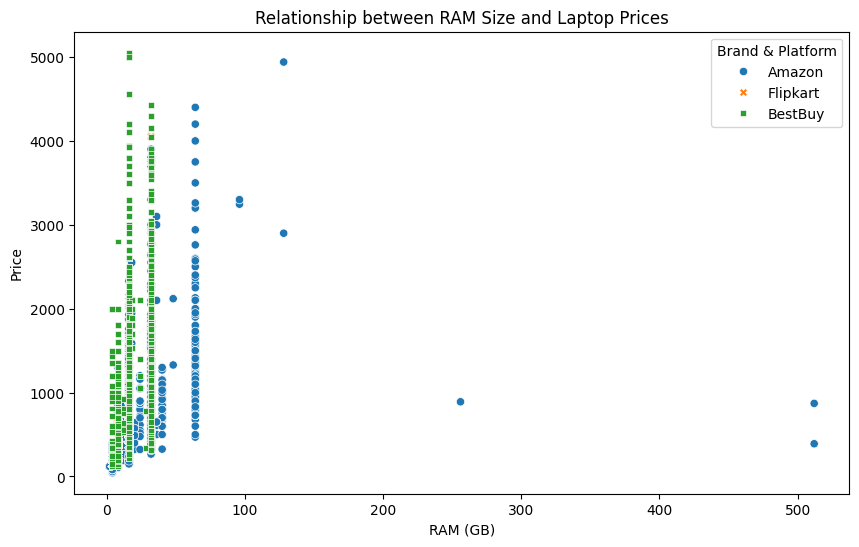

In [17]:
# Visualizing the data on scatter plot to identify relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='RAM', y='Price',hue="Source", style='Source')
plt.title('Relationship between RAM Size and Laptop Prices')
plt.xlabel('RAM (GB)')
plt.ylabel('Price')
plt.legend(title='Brand & Platform')
plt.show()

### Observation
- The above plot shows that for a given RAM size, the price of laptop can vary greatly, i.e. the variance is high.
- There are some laptops which are acting as outliers where the for RAM 250GB the price is 1000 USD, and belong to Amazon.
- The outliers are not very significant and can be dealt with later during model building if it causes an issue.
- The variance observation is consistent across the sources as evident in above plot.
- For better clarity for the mentioned point, lets plot few more visualizations.

#### NOTE: THE ORANGE FLIPKART POINTS ARE OVERLAPPED WITH AMAZON AND BEST BUY POINTS, TO BETTER UNDERSTAND FURTHER VISUALIZATIONS ARE DONE.

<Figure size 1000x600 with 0 Axes>

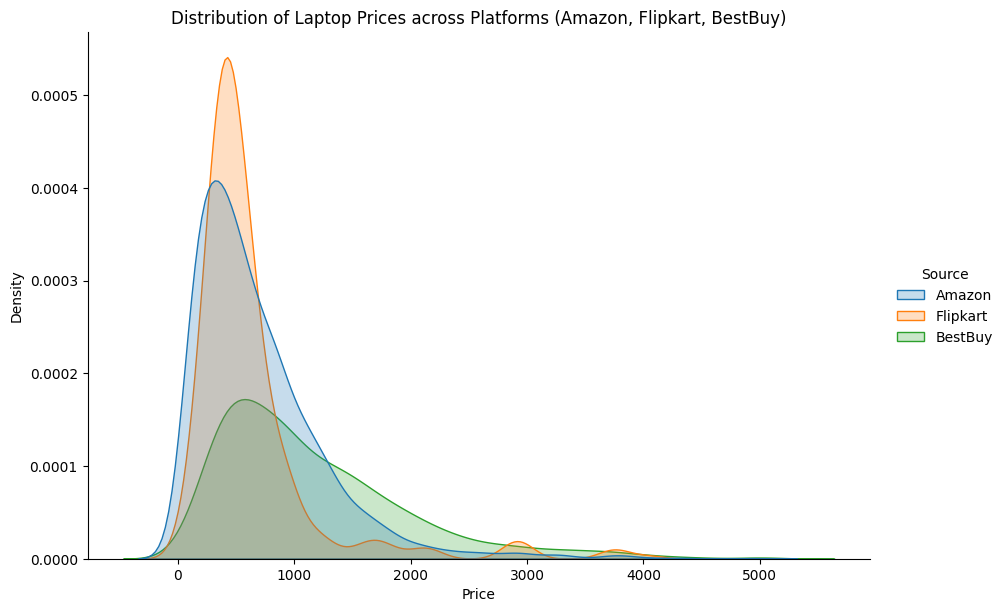

In [18]:
# Distribution of Price across Platforms
plt.figure(figsize=(10, 6))
sns.displot(data=df, x='Price', hue='Source', kind='kde', fill=True, height=6, aspect=1.5)

plt.title('Distribution of Laptop Prices across Platforms (Amazon, Flipkart, BestBuy)')
plt.xlabel('Price')
plt.ylabel('Density')

plt.show()

<Figure size 500x600 with 0 Axes>

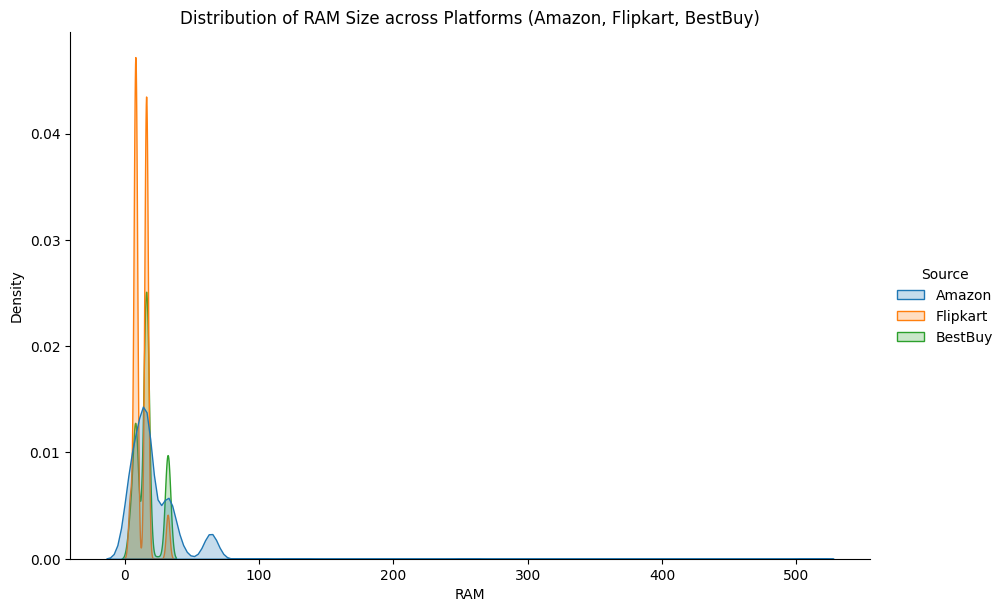

In [19]:
# Distribution of RAM across Platforms
plt.figure(figsize=(5, 6))
sns.displot(data=df, x='RAM', hue='Source', kind='kde', fill=True, height=6, aspect=1.5)

plt.title('Distribution of RAM Size across Platforms (Amazon, Flipkart, BestBuy)')
plt.xlabel('RAM')
plt.ylabel('Density')

plt.show()

### Observation
- The above distribution are consistent with our observatrions made above.

## Analysis Statement
- Which processor company (Intel, AMD, etc.) dominates the market across different price ranges?

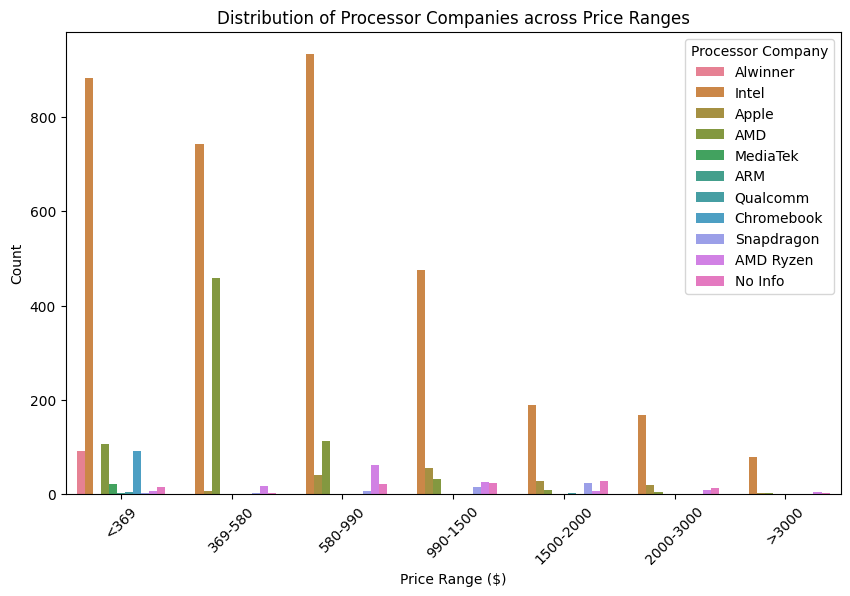

In [20]:
# Define price ranges (you can adjust the bins based on your data)
bins = [0, 370, 580, 990, 1500, 2000, 3000, df['Price'].max()]
labels = ['<369', '369-580', '580-990', '990-1500', '1500-2000', '2000-3000', '>3000']

# Create a new column for price ranges
df['Price_Range'] = pd.cut(df['Price'], bins=bins, labels=labels)

# Plot the distribution of processor companies across price ranges
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Price_Range', hue='Processor_Company')
plt.title('Distribution of Processor Companies across Price Ranges')
plt.xlabel('Price Range ($)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Processor Company')
plt.show()

### Observation
- The above plot tells that acroos different price ranges, the market is dominated by `Intel` followed by `Apple`.
- Even though `Apple` is know for being a market player for costly machines, the number of `Intel` products in that price bracket is way more than `Apple`.
- There are other processor companies as well which are present in different price brackets but are not having enough number of products to compete against the market dominators, `Intel` and `Apple`.
- An interesting point is that `ARM based processor` companies like, `mediatek`, `snapdragon`, `qualcomm`, ettc. are all entering the market with low end laptops and Apple seems to be absent in lower price bracket of `369 USD`. 

## Name: Yeswanth Chitturi
## UB ID:50591666

## Analysis Statement

- Which brand has more no of models in total and across platforms? what is the model with highest price in each brand in total and across platforms?

In [21]:
ydf=df.copy()
#Removing rows for easy hypothesis
ydf = ydf[ydf['Laptop_Name'] != 'No Model']
#All the unique models for each brand across platforms
unique_models = ydf[['Laptop_Brand', 'Laptop_Name', 'Source', 'Price']].drop_duplicates().sort_values(by='Laptop_Brand')
display(unique_models.head(5))

,Laptop_Brand,Laptop_Name,Source,Price
487,ACEMAGIC,AX16PRO,Amazon,759.54
1292,ACEMAGIC,AX16,Amazon,379.98
99,ACEMAGIC,AX16PRO,Amazon,599.99
452,ACEMAGIC,AX16,Amazon,341.96
670,ACEMAGIC,AX16,Amazon,379.95


In [22]:
# Grouping by Brand,Model
model_counts = ydf.groupby(['Laptop_Brand'])['Laptop_Name'].nunique().reset_index()

# Count of models
model_counts.columns = ['Laptop_Brand', 'Count_of_Models']
model_counts=model_counts.sort_values(by='Count_of_Models', ascending=False)

display(model_counts.head(5))

,Laptop_Brand,Count_of_Models
26,HP,199
36,LENOVO,160
15,DELL,116
10,ASUS,99
1,ACER,61


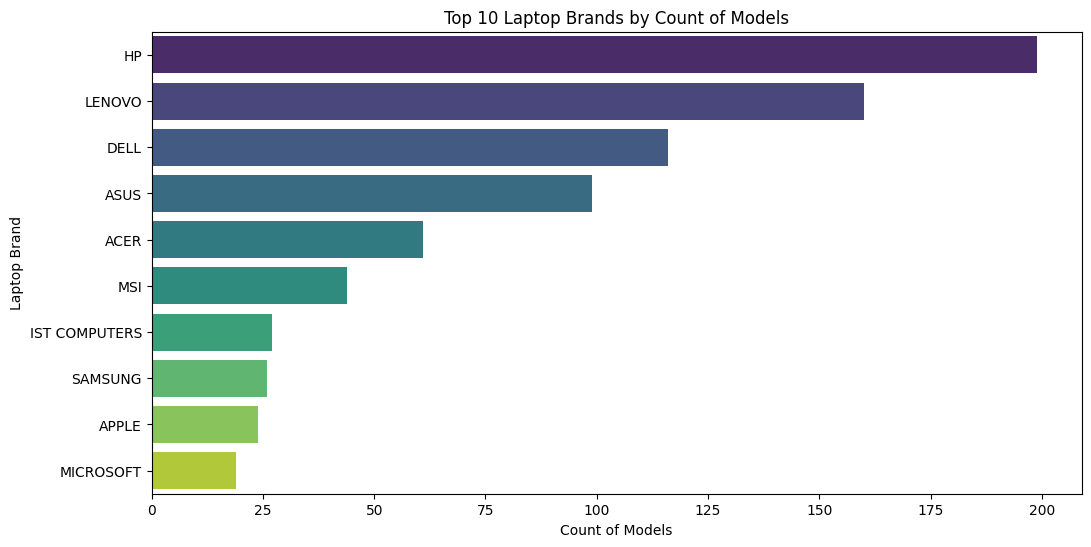

In [23]:
top_10_models = model_counts.sort_values(by='Count_of_Models', ascending=False).head(10)

plt.figure(figsize=(12, 6))

sns.barplot(x='Count_of_Models', y='Laptop_Brand', data=top_10_models, palette='viridis')

plt.title('Top 10 Laptop Brands by Count of Models')
plt.xlabel('Count of Models')
plt.ylabel('Laptop Brand')

plt.show()

### Observation
- Top 10 brand with more no of models
- Brands,HP,Lenovo,Dell,Asus,acer have more no of models across all three platforms.

In [24]:
model_counts = ydf.groupby(['Laptop_Brand', 'Source'])['Laptop_Name'].nunique().reset_index()
# Using pivot table
pivot_table = model_counts.pivot_table(index='Laptop_Brand', columns='Source', values='Laptop_Name', fill_value=0)

pivot_table.reset_index(inplace=True)

pivot_table.columns.name = None 
print(pivot_table.head())

  Laptop_Brand  Amazon  BestBuy  Flipkart
0     ACEMAGIC     4.0      0.0       0.0
1         ACER    49.0      9.0       8.0
2      AIMCARE     4.0      0.0       0.0
3     AKOCRSIY     1.0      0.0       0.0
4    ALIENWARE     3.0      4.0       0.0


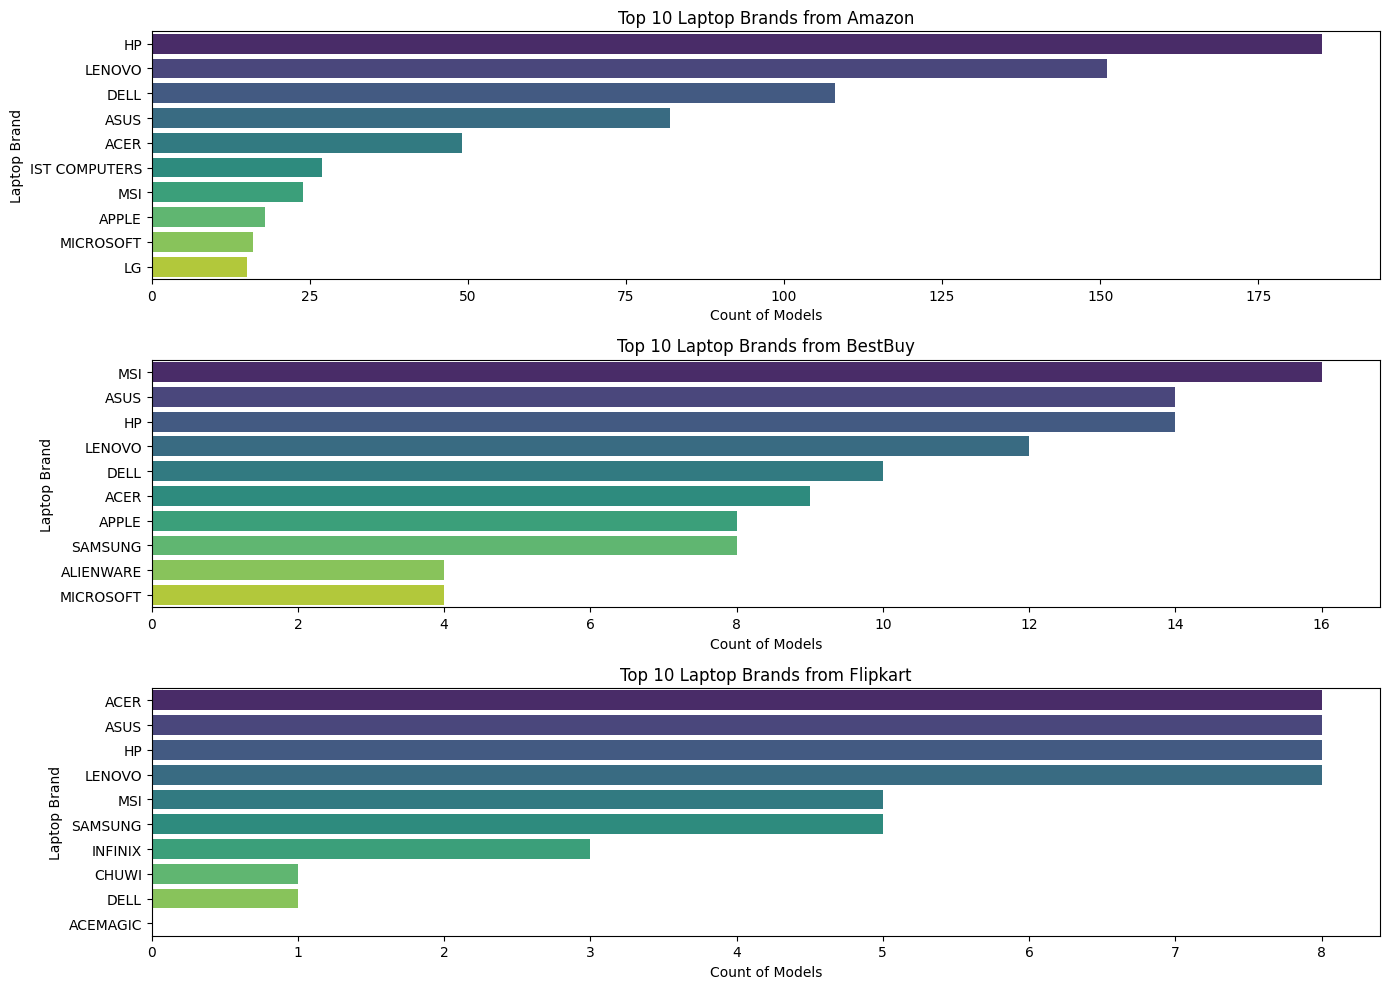

In [25]:
#Top 10 in each source
top_10_per_source = pd.DataFrame()

for source in pivot_table.columns[1:]:  
    top_10 = pivot_table.nlargest(10, source)  
    top_10['Source'] = source  
    top_10_per_source = pd.concat([top_10_per_source, top_10])  

top_10_per_source.reset_index(drop=True, inplace=True)
plt.figure(figsize=(14, 10))

for i, source in enumerate(pivot_table.columns[1:]):  
    plt.subplot(len(pivot_table.columns) - 1, 1, i + 1)  
    sns.barplot(x=source, y='Laptop_Brand', data=top_10_per_source[top_10_per_source['Source'] == source], palette='viridis')
    
    plt.title(f'Top 10 Laptop Brands from {source}')
    plt.xlabel('Count of Models')
    plt.ylabel('Laptop Brand')

plt.tight_layout()

plt.show()



### Observations
- Top 10 models in each platform
- HP, Lenovo, Dell models are more in Amazon.
- MSI,Asus,Hp are more in Best buy.
- Asus, Acer, Hp are more in Flipkart.

In [26]:
# selecting Max prices
highest_price_indices = ydf.groupby(['Laptop_Brand', 'Source'])['Price'].idxmax()
highest_price_models = ydf.loc[highest_price_indices]

highest_price_models = highest_price_models[['Laptop_Brand', 'Laptop_Name', 'Source', 'Price']].sort_values(by='Laptop_Brand')

#Models with highest prices in each brand across platforms
display(highest_price_models.head())

,Laptop_Brand,Laptop_Name,Source,Price
1070,ACEMAGIC,AX17,Amazon,1496.99
1511,ACER,Acer Predator Series,Amazon,1599.00
3917,ACER,Predator Triton,BestBuy,3799.99
2173,ACER,Acer Predator Helios Neo 16,Flipkart,1607.60
1378,AIMCARE,Workstation,Amazon,4199.00


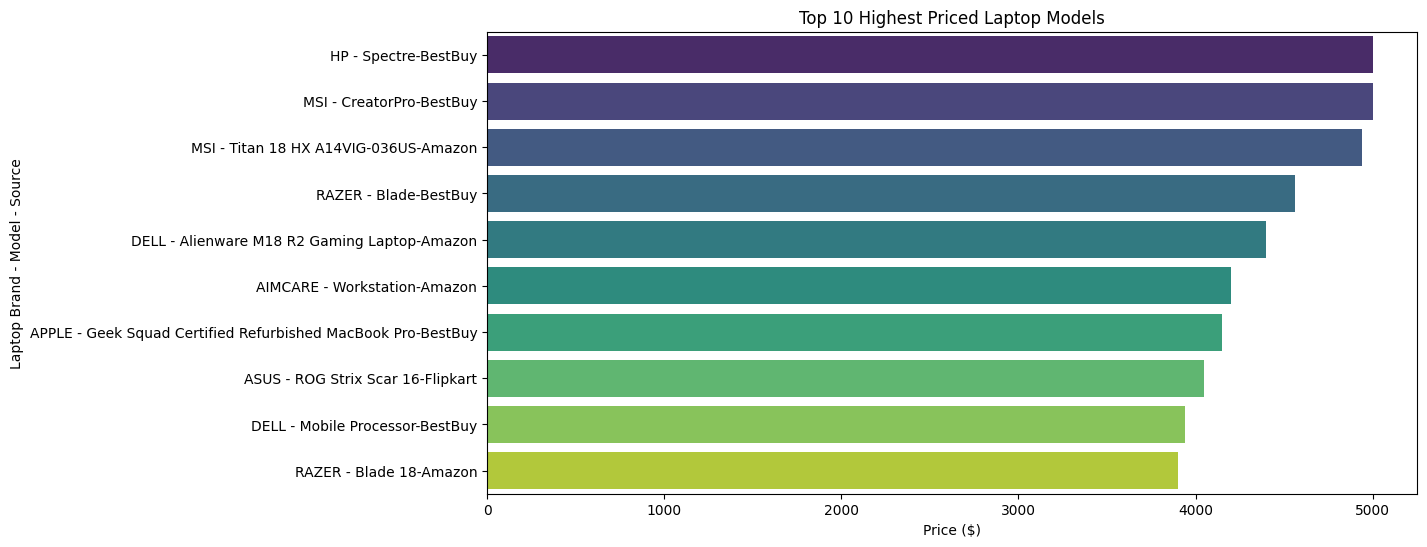

In [27]:

#top10
top_10_prices = highest_price_models.nlargest(10, 'Price')
#Adding required labels
top_10_prices['Brand_Model'] = top_10_prices['Laptop_Brand'] + ' - ' + top_10_prices['Laptop_Name'] + '-' + top_10_prices['Source']

plt.figure(figsize=(12, 6))

sns.barplot(x='Price', y='Brand_Model', data=top_10_prices, palette='viridis')

plt.title('Top 10 Highest Priced Laptop Models')
plt.xlabel('Price ($)')
plt.ylabel('Laptop Brand - Model - Source')

plt.show()

### Observations 
- These models have the highest price across the three platforms
- Hp spectre Bestbuy, MSI creator pro BestBuy , MSI 18 Titan Hx  Amazon are the top three costliest models.

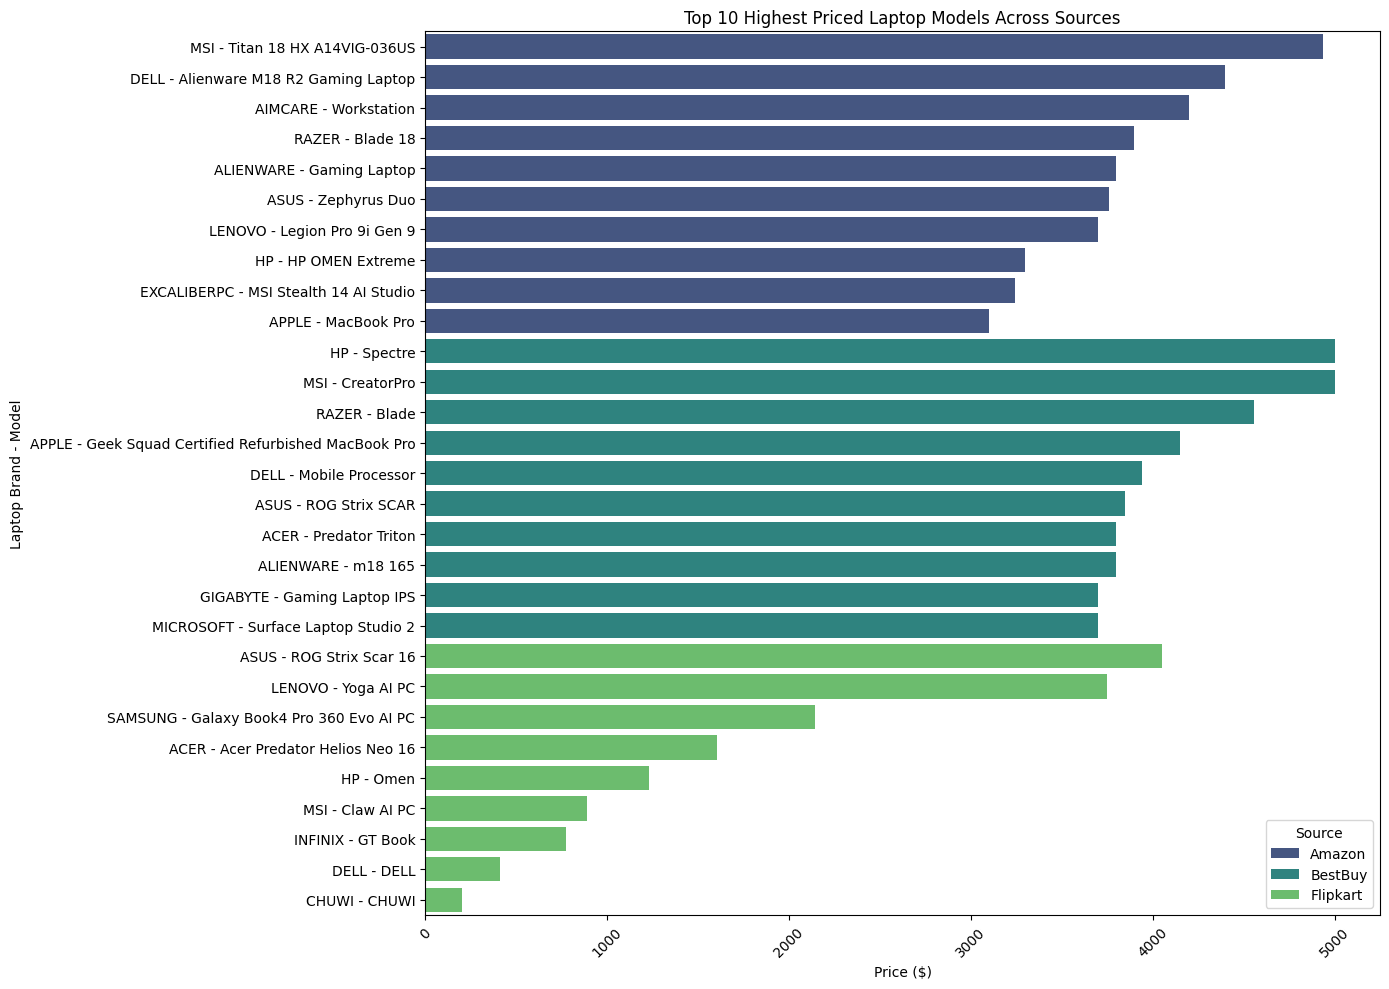

In [28]:
# Souces
sources = highest_price_models['Source'].unique()

top_10_all_sources = pd.DataFrame()

for source in sources:
    source_data = highest_price_models[highest_price_models['Source'] == source]
    
    top_10_prices = source_data.nlargest(10, 'Price')
    
    top_10_prices['Brand_Model'] = top_10_prices['Laptop_Brand'] + ' - ' + top_10_prices['Laptop_Name']
    
    top_10_prices['Source'] = source
    top_10_all_sources = pd.concat([top_10_all_sources, top_10_prices])

plt.figure(figsize=(14, 10))
sns.barplot(x='Price', y='Brand_Model', hue='Source', data=top_10_all_sources, palette='viridis')

plt.title('Top 10 Highest Priced Laptop Models Across Sources')
plt.xlabel('Price ($)')
plt.ylabel('Laptop Brand - Model')

plt.xticks(rotation=45) 
plt.legend(title='Source')
plt.tight_layout()
plt.show()

### Observations
- MSI model titan 18 HX is with highest price in Amazon
- Hp spectre is with highest price in BestBuy
- ASUS ROG Strix scar 16 is with highest price in Flipkart


## Analysis Statement 
- What are the varieties in screen sizes for all models across platforms ? Average screen sizes for each brand? which screen size have better rating? What is the relation between ram and storage with screen sizes?

In [29]:
#Grouping required columns
bdf = df[['Screen_Size', 'Laptop_Brand', 'Laptop_Name', 'RAM', 'Storage', 'Rating','Source']].drop_duplicates()
display(bdf.head())

,Screen_Size,Laptop_Brand,Laptop_Name,RAM,Storage,Rating,Source
0,10.1,ZHAOHUIXIN,PC1068,2,64,4.5,Amazon
1,15.6,TPV,AceBook,16,512,4.5,Amazon
2,16.0,HP,Elitebook,32,2048,4.0,Amazon
3,13.6,APPLE,MacBook Air,8,256,4.0,Amazon
4,15.3,APPLE,MacBook Air,16,512,4.0,Amazon


In [30]:
#Unique screen sizes
unique_screen_sizes = bdf['Screen_Size'].unique()
print("Total Unique screen sizes across platforms:", len(unique_screen_sizes))
print(unique_screen_sizes)


Total Unique screen sizes across platforms: 38
[10.1  15.6  16.   13.6  15.3  14.   17.3  14.2  13.3  16.2  15.5  15.
 11.6  13.   16.1  14.1  11.   13.4  18.   12.45 14.5  12.2  13.5  11.5
 17.   15.4   8.   12.3  14.4  10.51 13.1  12.5  12.   13.8  12.4   7.
 16.3  10.5 ]


In [31]:
#Unique models
model_unique_screensizes = ydf[['Screen_Size', 'Laptop_Brand', 'Laptop_Name','Source']].drop_duplicates()
display(model_unique_screensizes.head())

,Screen_Size,Laptop_Brand,Laptop_Name,Source
0,10.1,ZHAOHUIXIN,PC1068,Amazon
1,15.6,TPV,AceBook,Amazon
2,16.0,HP,Elitebook,Amazon
3,13.6,APPLE,MacBook Air,Amazon
4,15.3,APPLE,MacBook Air,Amazon


In [32]:
# Sizes
screen_size_counts = model_unique_screensizes.groupby('Laptop_Brand')['Screen_Size'].nunique().reset_index()

screen_size_counts.columns = ['Laptop_Brand', 'Unique_Screen_Size_Count']

display(screen_size_counts.head())

,Laptop_Brand,Unique_Screen_Size_Count
0,ACEMAGIC,4
1,ACER,13
2,AIMCARE,4
3,AKOCRSIY,1
4,ALIENWARE,4


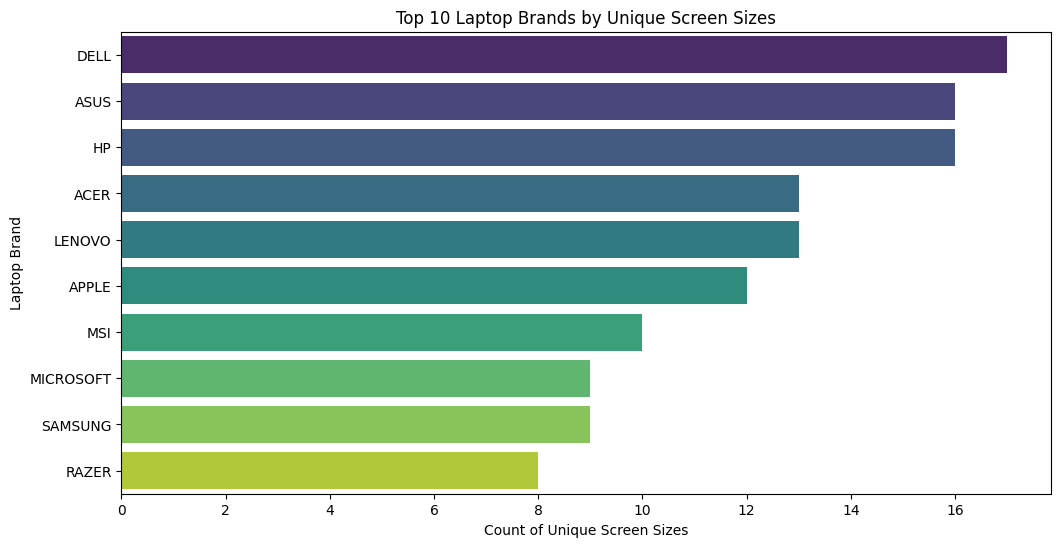

In [33]:
top_10_brands = screen_size_counts.nlargest(10, 'Unique_Screen_Size_Count')

plt.figure(figsize=(12, 6))

sns.barplot(x='Unique_Screen_Size_Count', y='Laptop_Brand', data=top_10_brands, palette='viridis')

plt.title('Top 10 Laptop Brands by Unique Screen Sizes')
plt.xlabel('Count of Unique Screen Sizes')
plt.ylabel('Laptop Brand')

plt.show()

### Observations
- Total no of screen sizes:38
- models with unique screen sizes.
- No of screen sizes each brand offer.
- Top 10 brands with more no of unique screen sizes.
- Dell, Asus , Hp has more no of screen sizes across three platforms.

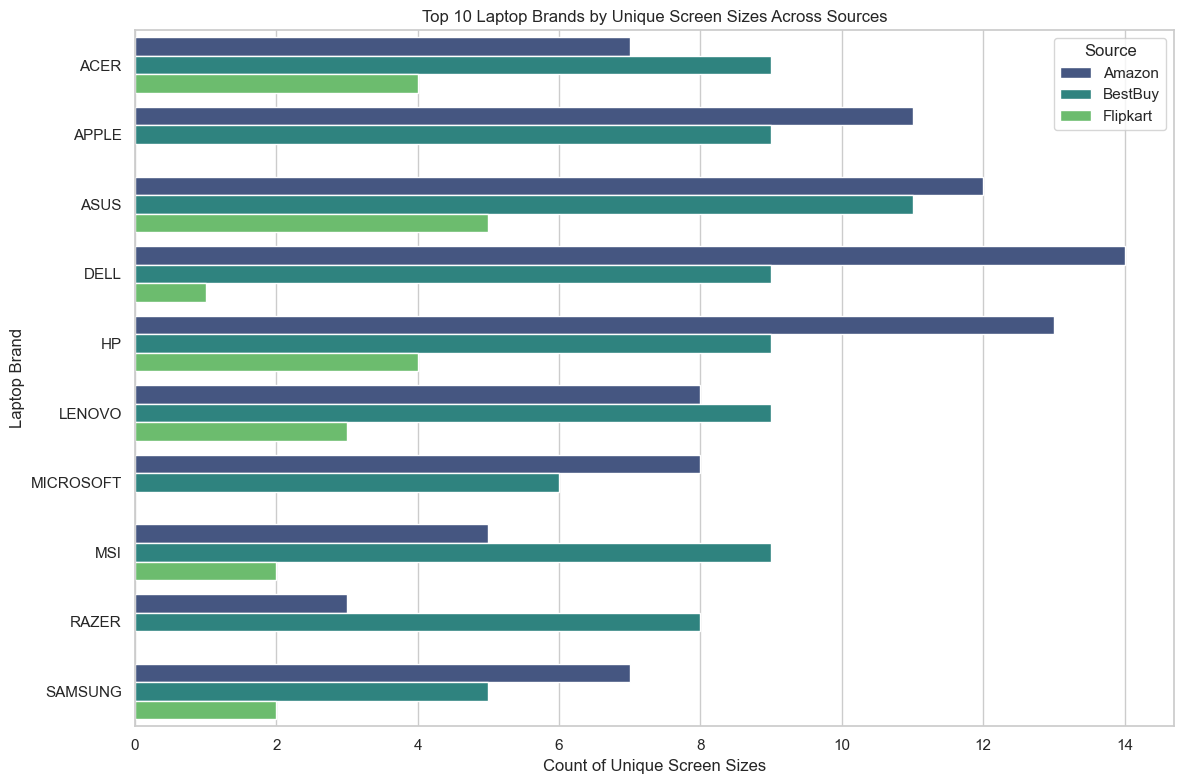

In [34]:
screen_size_counts_by_source = model_unique_screensizes.groupby(['Laptop_Brand', 'Source'])['Screen_Size'].nunique().reset_index()

screen_size_counts_by_source.columns = ['Laptop_Brand', 'Source', 'Unique_Screen_Size_Count']


top_10_all_sources = screen_size_counts_by_source.groupby('Laptop_Brand').agg({'Unique_Screen_Size_Count': 'sum'}).reset_index()
top_10_all_sources = top_10_all_sources.nlargest(10, 'Unique_Screen_Size_Count')

top_10_with_source = screen_size_counts_by_source[screen_size_counts_by_source['Laptop_Brand'].isin(top_10_all_sources['Laptop_Brand'])]

sns.set(style="whitegrid")

plt.figure(figsize=(12, 8))
sns.barplot(x='Unique_Screen_Size_Count', y='Laptop_Brand', hue='Source', data=top_10_with_source, palette='viridis')

plt.title('Top 10 Laptop Brands by Unique Screen Sizes Across Sources')
plt.xlabel('Count of Unique Screen Sizes')
plt.ylabel('Laptop Brand')

plt.legend(title='Source')
plt.tight_layout()
plt.show()

### Observations
- Dell , Hp, Asus are top 3 highest no of screen sizes in Amazon.
- Asus, Acer, Apple are top 3 highest no of screen sizes in Bestbuy.
- Asus, Acer, Hp are top 3 highest no of screen sizes in Flipkart.

In [35]:
#Average sizes for each brand
average_screen_sizes = bdf.groupby('Laptop_Brand')['Screen_Size'].mean().reset_index()

average_screen_sizes.columns = ['Laptop_Brand', 'Average_Screen_Size']

average_screen_sizes['Average_Screen_Size'] = average_screen_sizes['Average_Screen_Size'].round(2)

average_screen_sizes = average_screen_sizes.sort_values(by='Average_Screen_Size')
#average_screen_sizes = average_screen_sizes.sort_values(by=['Average_Screen_Size'],ascending=False)
display(average_screen_sizes.head())

,Laptop_Brand,Average_Screen_Size
34,KOOFORWAY,8.0
35,KOOSMILE,8.0
68,ZHAOHUIXIN,10.1
25,HARRY POTTER,11.6
20,GATEWAY,11.6


In [36]:
average_screen_sizes_by_source = ydf.groupby(['Laptop_Brand', 'Source'])['Screen_Size'].mean().reset_index()

average_screen_sizes_by_source.columns = ['Laptop_Brand', 'Source', 'Average_Screen_Size']
average_screen_sizes_by_source['Average_Screen_Size'] = average_screen_sizes_by_source['Average_Screen_Size'].round(2)
#average_screen_sizes_by_source = average_screen_sizes_by_source.sort_values(by=[ 'Average_Screen_Size'])
average_screen_sizes_by_source = average_screen_sizes_by_source.sort_values(by=[ 'Average_Screen_Size'],ascending=False)
print(average_screen_sizes_by_source.head())

   Laptop_Brand  Source  Average_Screen_Size
64      NBVCXSD  Amazon                17.30
39       IJKKJI  Amazon                17.30
62       MTWZMM  Amazon                17.30
69        RAZER  Amazon                17.10
6     ALIENWARE  Amazon                16.67


### Observations
- Most of the models have screen size grater than 14 inches.
- Amazon has highest screen sizes greter than 17 inches.
- Amazon has lowest screen size models of sizes  8 inches.
- Brand Koosmile has the lowest screen sizes.
- Brand NBVCX has the highest screen sizes.


In [37]:
average_rating_by_screen_size = bdf.groupby('Screen_Size')['Rating'].mean().reset_index()

average_rating_by_screen_size.columns = ['Screen_Size', 'Average_Rating']

average_rating_by_screen_size['Average_Rating'] = average_rating_by_screen_size['Average_Rating'].round(2)

sorted_average_rating = average_rating_by_screen_size.sort_values(by='Average_Rating', ascending=False).reset_index(drop=True)

display(sorted_average_rating.head())

,Screen_Size,Average_Rating
0,13.80,4.60
1,12.20,4.57
2,13.60,4.53
3,11.50,4.50
4,10.51,4.50


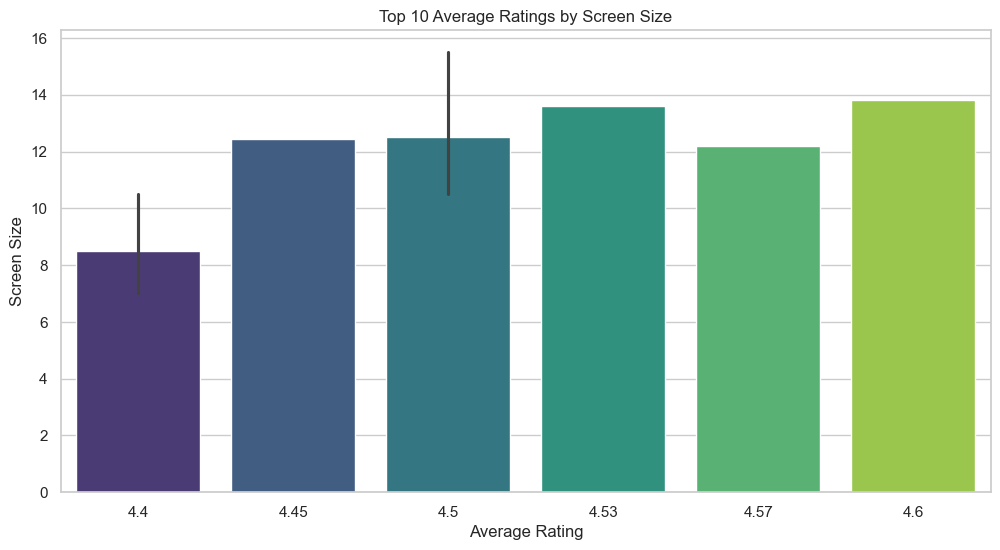

In [38]:
top_10_average_rating = sorted_average_rating.head(10)

plt.figure(figsize=(12, 6))

sns.barplot(x='Average_Rating', y='Screen_Size', data=top_10_average_rating, palette='viridis')

plt.title('Top 10 Average Ratings by Screen Size')
plt.xlabel('Average Rating')
plt.ylabel('Screen Size')

plt.show()

### Observations
- Screen sizes 13.80, 12.20,13.60, has the highest rating of 4.60, 4.57, 4.53 respectively.
- Top 10 screen size models with highest ratings.

In [39]:
average_rating_by_source_and_size = bdf.groupby(['Source', 'Screen_Size'])['Rating'].mean().reset_index()

average_rating_by_source_and_size.columns = ['Source', 'Screen_Size', 'Average_Rating']

average_rating_by_source_and_size['Average_Rating'] = average_rating_by_source_and_size['Average_Rating'].round(2)

print(average_rating_by_source_and_size.head())

   Source  Screen_Size  Average_Rating
0  Amazon         7.00            4.40
1  Amazon         8.00            4.40
2  Amazon        10.10            4.47
3  Amazon        10.51            4.50
4  Amazon        11.00            4.41


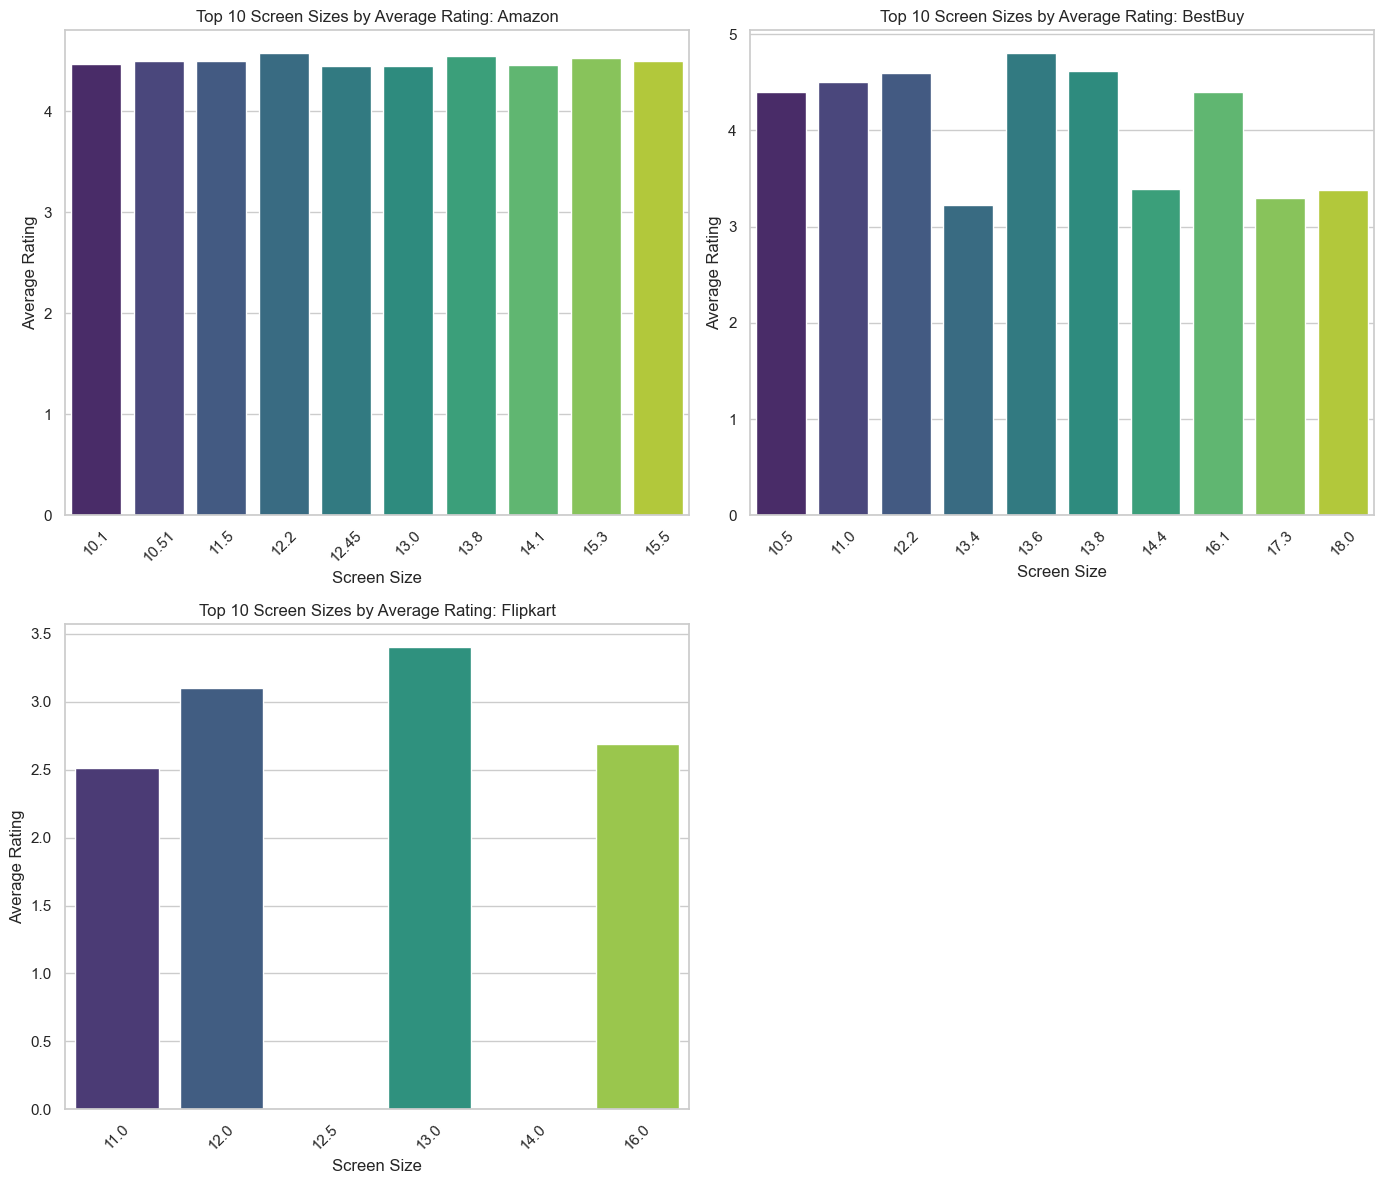

In [40]:
average_rating_by_source_and_size = bdf.groupby(['Source', 'Screen_Size'])['Rating'].mean().reset_index()

average_rating_by_source_and_size.columns = ['Source', 'Screen_Size', 'Average_Rating']

average_rating_by_source_and_size['Average_Rating'] = average_rating_by_source_and_size['Average_Rating'].round(2)

sources = average_rating_by_source_and_size['Source'].unique()

n = len(sources)
ncols = 2  
nrows = (n + ncols - 1) // ncols  

plt.figure(figsize=(14, 6 * nrows))

for i, source in enumerate(sources):
    ax = plt.subplot(nrows, ncols, i + 1)
    
    source_data = average_rating_by_source_and_size[average_rating_by_source_and_size['Source'] == source]
    
    top_10_source_data = source_data.nlargest(10, 'Average_Rating')
    
    sns.barplot(x='Screen_Size', y='Average_Rating', data=top_10_source_data, palette='viridis', ax=ax)
    
    ax.set_title(f'Top 10 Screen Sizes by Average Rating: {source}')
    ax.set_xlabel('Screen Size')
    ax.set_ylabel('Average Rating')
    ax.tick_params(axis='x', rotation=45) 

plt.tight_layout()

plt.show()

### Observations
- screen sizes across platforms.

In [41]:
#Grouping data
average_screen_size_by_ram_storage = bdf.groupby(['RAM', 'Storage'])['Screen_Size'].mean().reset_index()

average_screen_size_by_ram_storage.columns = ['RAM', 'Storage', 'Average_Screen_Size']

average_screen_size_by_ram_storage['Average_Screen_Size'] = average_screen_size_by_ram_storage['Average_Screen_Size'].round(2)

sorted_average_screen_size_by_ram_storage = average_screen_size_by_ram_storage.sort_values(by='Average_Screen_Size', ascending=False)

print(sorted_average_screen_size_by_ram_storage.head())

    RAM Storage  Average_Screen_Size
69   40     512                17.30
62   32    8192                17.00
80  128    8192                17.00
77   64    8192                16.36
76   64    4096                16.21


In [42]:
# Group by RAM 
average_screen_size_by_ram = bdf.groupby('RAM')['Screen_Size'].mean().reset_index()

average_screen_size_by_ram.columns = ['RAM', 'Average_Screen_Size']

average_screen_size_by_ram['Average_Screen_Size'] = average_screen_size_by_ram['Average_Screen_Size'].round(2)

average_screen_size_by_ram_sorted = average_screen_size_by_ram.sort_values(by='Average_Screen_Size')

print(average_screen_size_by_ram_sorted.head())


    RAM  Average_Screen_Size
0     2                 10.1
17  256                 13.0
9    28                 13.3
18  512                 13.5
1     4                 13.7


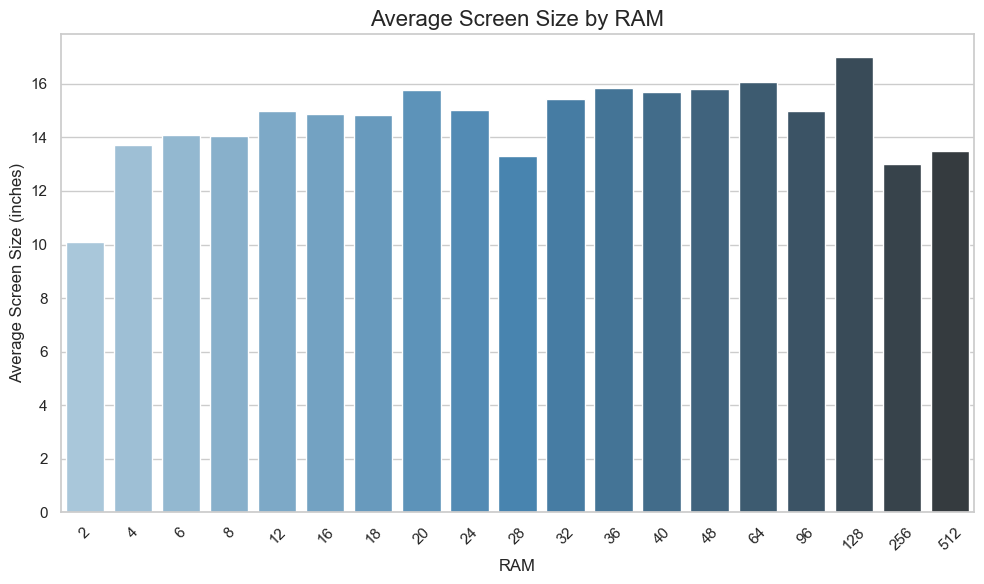

In [43]:
plt.figure(figsize=(10,6))

# Create the seaborn barplot
sns.barplot(x='RAM', y='Average_Screen_Size', data=average_screen_size_by_ram_sorted, palette='Blues_d')

plt.title('Average Screen Size by RAM', fontsize=16)
plt.xlabel('RAM', fontsize=12)
plt.ylabel('Average Screen Size (inches)', fontsize=12)

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [44]:
# Group by Storage and calculating the mean of Screen_Size
average_screen_size_by_storage = bdf.groupby('Storage')['Screen_Size'].mean().reset_index()

average_screen_size_by_storage.columns = ['Storage', 'Average_Screen_Size']

average_screen_size_by_storage['Average_Screen_Size'] = average_screen_size_by_storage['Average_Screen_Size'].round(2)

average_screen_size_by_storage_sorted = average_screen_size_by_storage.sort_values(by='Average_Screen_Size', ascending=False)

print(average_screen_size_by_storage_sorted.head())


   Storage  Average_Screen_Size
21    8192                16.32
5    16384                16.00
19     640                16.00
14    4096                15.95
8     2048                15.60


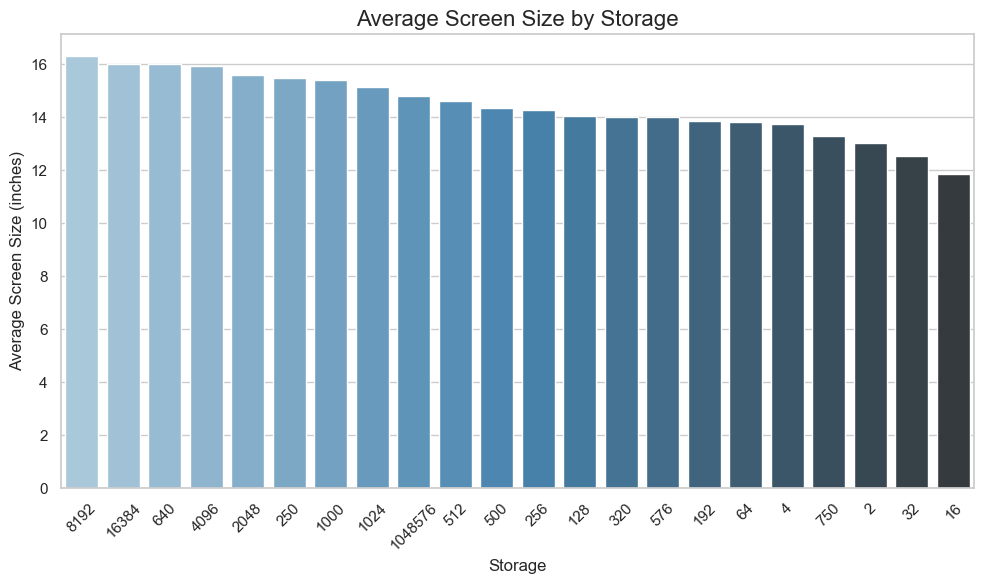

In [45]:
plt.figure(figsize=(10,6))

sns.barplot(x='Storage', y='Average_Screen_Size', data=average_screen_size_by_storage_sorted, palette='Blues_d')

plt.title('Average Screen Size by Storage', fontsize=16)
plt.xlabel('Storage', fontsize=12)
plt.ylabel('Average Screen Size (inches)', fontsize=12)

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### Observations
- Models with ram size 128,64,36 have higher screen sizes.
- Models with ram size 2,256,128 have lower screen sizes.
- Models with storage size 8192,640,16384 has the higher screen sizes.
- Models with storage size 2,32,16 has the lower screen sizes.

## Name: Shaurya Mathur
## UB ID:50611201

In [281]:
sdf = df.copy()
sdf.head()

,Laptop_Brand,Laptop_Name,Processor_Company,Operating_System,Processor,Number_of_Reviews,Price,Storage_Type,Storage,Rating,Screen_Size,RAM,Source
0,ZHAOHUIXIN,PC1068,Alwinner,Android,1.8 GHz a13,1,119.99,EMMC,64,4.5,10.1,2,Amazon
1,TPV,AceBook,Intel,Windows 11 Pro,Core i5,13,309.99,SSD,512,4.5,15.6,16,Amazon
2,HP,Elitebook,Intel,Windows 11 Pro,Intel Core i7,5,1079.00,SSD,2048,4.0,16.0,32,Amazon
3,Apple,MacBook Air,Apple,Mac OS,Apple M3,0,929.00,SSD,256,4.0,13.6,8,Amazon
4,Apple,MacBook Air,Apple,Mac OS,Apple M3,0,1449.00,SSD,512,4.0,15.3,16,Amazon


In [283]:
sdf.columns

Index(['Laptop_Brand', 'Laptop_Name', 'Processor_Company', 'Operating_System',
       'Processor', 'Number_of_Reviews', 'Price', 'Storage_Type', 'Storage',
       'Rating', 'Screen_Size', 'RAM', 'Source'],
      dtype='object')

#### Question
**How do the prices of laptops with similar specifications vary across brands?**

In [284]:
sdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4815 entries, 0 to 4837
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Laptop_Brand       4815 non-null   object 
 1   Laptop_Name        4815 non-null   object 
 2   Processor_Company  4815 non-null   object 
 3   Operating_System   4815 non-null   object 
 4   Processor          4815 non-null   object 
 5   Number_of_Reviews  4815 non-null   int64  
 6   Price              4815 non-null   float64
 7   Storage_Type       4815 non-null   object 
 8   Storage            4815 non-null   object 
 9   Rating             4815 non-null   float64
 10  Screen_Size        4815 non-null   float64
 11  RAM                4815 non-null   int64  
 12  Source             4815 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 526.6+ KB


In [285]:
sdf.describe().T

,count,mean,std,min,25%,50%,75%,max
Number_of_Reviews,4815.0,131.620768,245.316441,0.00,1.00,17.00,194.00,5121.00
Price,4815.0,797.631734,690.321336,44.79,369.17,579.99,989.99,5049.99
Rating,4815.0,3.729221,1.481900,0.00,4.00,4.30,4.40,5.00
Screen_Size,4815.0,14.074457,1.907507,7.00,12.75,14.00,15.60,18.00
RAM,4815.0,16.904258,16.381328,2.00,8.00,16.00,16.00,512.00


In [292]:
sdf['Processor'].unique()

array(['1.8 GHz a13', 'Core i5', 'Core i7', 'M3', 'Celeron N', 'Ryzen 5',
       'Ryzen 3', 'Intel Mobile CPU', 'Celeron N4020', 'Core i3',
       'Celeron', 'Cortex', 'M1', 'Ryzen 7', 'A13', 'Celeron P4500',
       'Ryzen 9', 'Pentium N5000', 'Core i9', 'Unknown', 'Celeron N5095',
       'Mediatek Mt8173C', 'AMD R Series', 'Celeron N4000', 'Pentium',
       'Celeron N3350', 'M2', 'Intel Pentium 4', 'AMD A4', 'AMD A Series',
       'Core m3-8100Y', '1.2GHz Cortex A8 Processor', 'MediaTek MT8183',
       'Others', 'Athlon', 'Celeron N3060', 'Intel Celeron D',
       'Celeron 5205U', '1', 'Celeron N3450', 'H8S',
       'Intel Core M-5Y10 Processor', 'Intel Core Ultra 7', 'core_m',
       '2.8 GHz', '68LC040', 'MediaTek Helio', 'Pentium Other',
       'Core I3 1115G4', 'Mobile Intel Celeron Processor', 'Intel Core 7',
       'Intel Processor N100', 'Intel Core Ultra 5', 'Celeron N2840',
       '4.2 GHz', 'ARMv7', 'Qualcomm Snapdragon S4 MSM8270',
       'Intel PDC G2030', '4.8 GHz', '1.90

In [293]:
sdf['Processor'] = sdf['Processor'].replace({
    r'.*i3.*': 'Core i3',
    r'.*i9.*': 'Core i9',
    r'.*i5.*': 'Core i5',
    r'.*M3 Pro.*': 'M3 Pro',
    r'.*M2 Pro.*': 'M2 Pro',
    r'.*M1 Pro.*': 'M1 Pro',
    r'.*Ryzen 3.*': 'Ryzen 3',
    r'.*Ryzen 5.*': 'Ryzen 5',
    r'.*Ryzen 7.*': 'Ryzen 7',
    r'.*i7.*': 'Core i7' 
}, regex=True)

In [299]:
sdf.loc[sdf['Laptop_Brand'] == 'Apple', 'Processor'] = sdf.loc[sdf['Laptop_Brand'] == 'Apple', 'Processor'].replace({
    r'.*M3.*': 'M3',
    r'.*M1.*': 'M1',
    r'.*M2.*': 'M2'
}, regex=True)

In [300]:
sdf.loc[(sdf['Processor_Company'] == 'Apple') & (sdf['Laptop_Brand'] != 'Apple'), 'Laptop_Brand'] = 'Apple'

In [301]:
no_info_rows = sdf[sdf['Processor'].str.contains('No Info', na=False)]

In [302]:
sdf = sdf[~sdf['Processor'].str.contains('No Info', na=False)]

In [303]:
len(sdf['Processor'].unique())

622

In [304]:
sdf['Processor'].unique()

array(['1.8 GHz a13', 'Core i5', 'Core i7', 'M3', 'Celeron N', 'Ryzen 5',
       'Ryzen 3', 'Intel Mobile CPU', 'Celeron N4020', 'Core i3',
       'Celeron', 'Cortex', 'M1', 'Ryzen 7', 'A13', 'Celeron P4500',
       'Ryzen 9', 'Pentium N5000', 'Core i9', 'Unknown', 'Celeron N5095',
       'Mediatek Mt8173C', 'AMD R Series', 'Celeron N4000', 'Pentium',
       'Celeron N3350', 'M2', 'Intel Pentium 4', 'AMD A4', 'AMD A Series',
       'Core m3-8100Y', '1.2GHz Cortex A8 Processor', 'MediaTek MT8183',
       'Others', 'Athlon', 'Celeron N3060', 'Intel Celeron D',
       'Celeron 5205U', '1', 'Celeron N3450', 'H8S',
       'Intel Core M-5Y10 Processor', 'Intel Core Ultra 7', 'core_m',
       '2.8 GHz', '68LC040', 'MediaTek Helio', 'Pentium Other',
       'Core I3 1115G4', 'Mobile Intel Celeron Processor', 'Intel Core 7',
       'Intel Processor N100', 'Intel Core Ultra 5', 'Celeron N2840',
       '4.2 GHz', 'ARMv7', 'Qualcomm Snapdragon S4 MSM8270',
       'Intel PDC G2030', '4.8 GHz', '1.90

### To narrow down the scope of this question we will consider only the top 10 most frequent brands and processor models

In [306]:
top_10_brands = sdf['Laptop_Brand'].value_counts().head(10)
top_10_brands

Laptop_Brand
HP         1026
Lenovo      663
Dell        520
ASUS        442
Apple       396
Acer        368
MSI         242
SAMSUNG     192
acer        107
Infinix     104
Name: count, dtype: int64

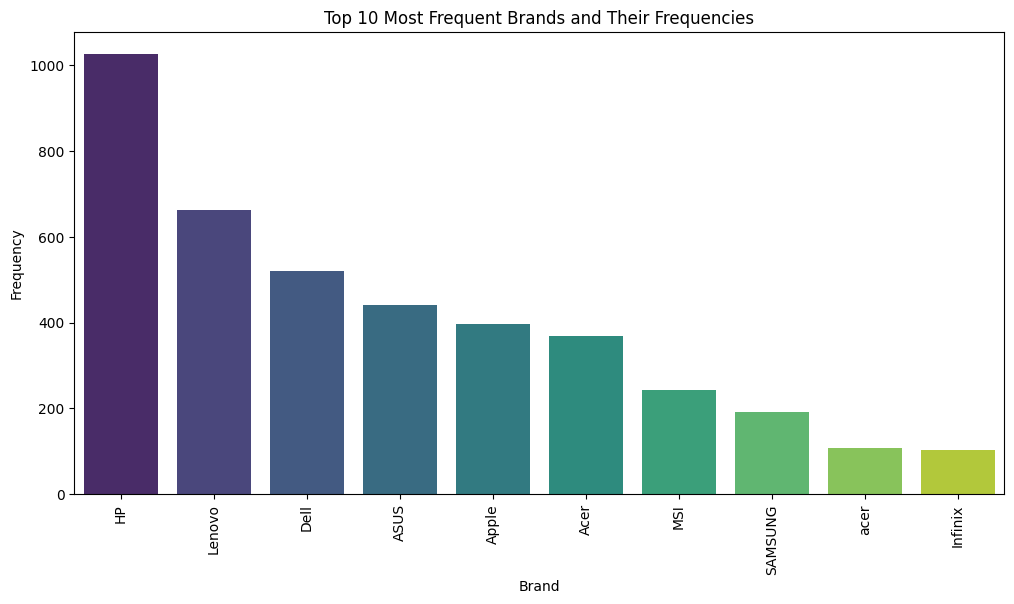

In [307]:
plt.figure(figsize=(12, 6)) 
sns.barplot(x=top_10_brands.index, y=top_10_brands.values, palette='viridis')

plt.title('Top 10 Most Frequent Brands and Their Frequencies')
plt.xlabel('Brand')
plt.ylabel('Frequency')
plt.xticks(rotation=90) 

plt.show()

In [308]:
top_10_processors = sdf['Processor'].value_counts().head(10)
top_10_processors

Processor
Core i5             1063
Core i7              643
Core i3              391
Ryzen 3              296
Ryzen 5              273
Core i9              133
Ryzen 7              120
Celeron              119
Intel Mobile CPU     104
MediaTek MT8183       75
Name: count, dtype: int64

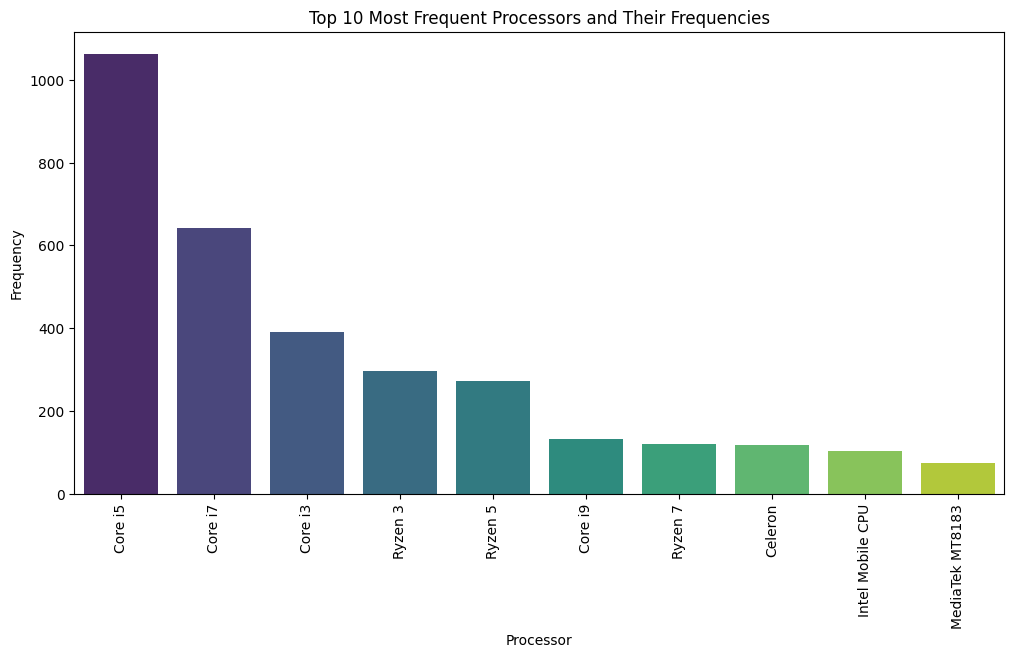

In [309]:
plt.figure(figsize=(12, 6))  # Set the figure size
sns.barplot(x=top_10_processors.index, y=top_10_processors.values, palette='viridis')

plt.title('Top 10 Most Frequent Processors and Their Frequencies')
plt.xlabel('Processor')
plt.ylabel('Frequency')
plt.xticks(rotation=90) 

plt.show()

In [310]:
top_10_processors_list = sdf['Processor'].value_counts().head(10).index.tolist()
filtered_processor_df = sdf[sdf['Processor'].isin(top_10_processors_list)]

In [311]:
top_10_brands_list = sdf['Laptop_Brand'].value_counts().head(10).index.tolist()
filtered_processor_N_brandDF = filtered_processor_df[filtered_processor_df['Laptop_Brand'].isin(top_10_brands_list)]
filtered_processor_N_brandDF.shape

(2876, 13)

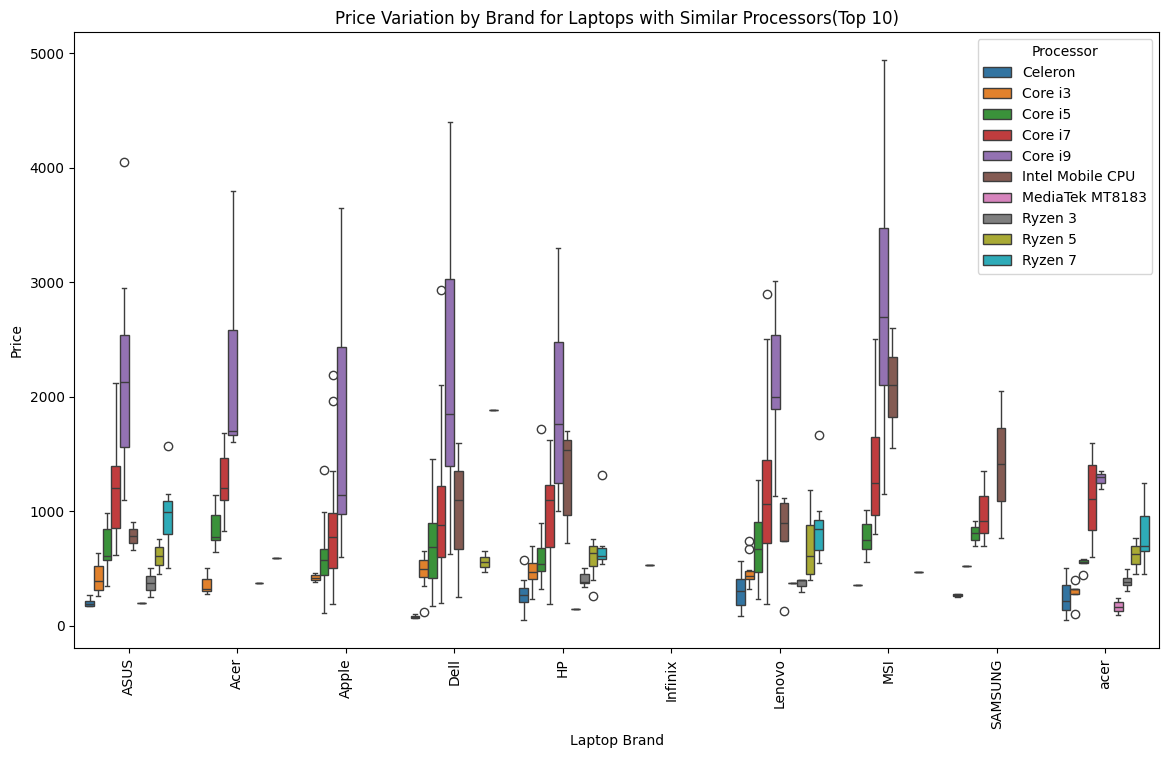

In [312]:
grouped_data = filtered_processor_N_brandDF.groupby(['Laptop_Brand', 'Processor', 'RAM', 'Storage', 'Screen_Size'])['Price'].mean().reset_index()

plt.figure(figsize=(14, 8))
sns.boxplot(data=grouped_data, x='Laptop_Brand', y='Price', hue='Processor')
plt.title('Price Variation by Brand for Laptops with Similar Processors(Top 10)')
plt.xticks(rotation=90)  
plt.ylabel('Price')
plt.xlabel('Laptop Brand')

plt.show()

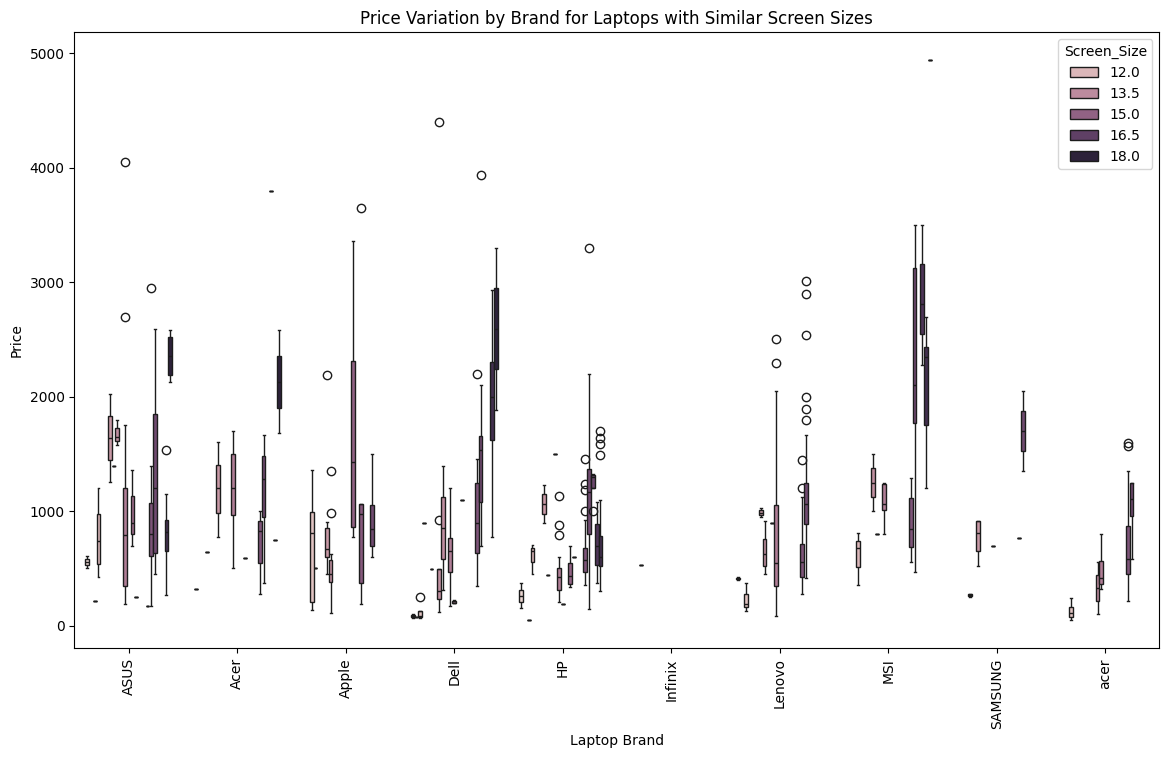

In [313]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=grouped_data, x='Laptop_Brand', y='Price', hue='Screen_Size')
plt.title('Price Variation by Brand for Laptops with Similar Screen Sizes')
plt.xticks(rotation=90)  
plt.ylabel('Price')
plt.xlabel('Laptop Brand')

plt.show()

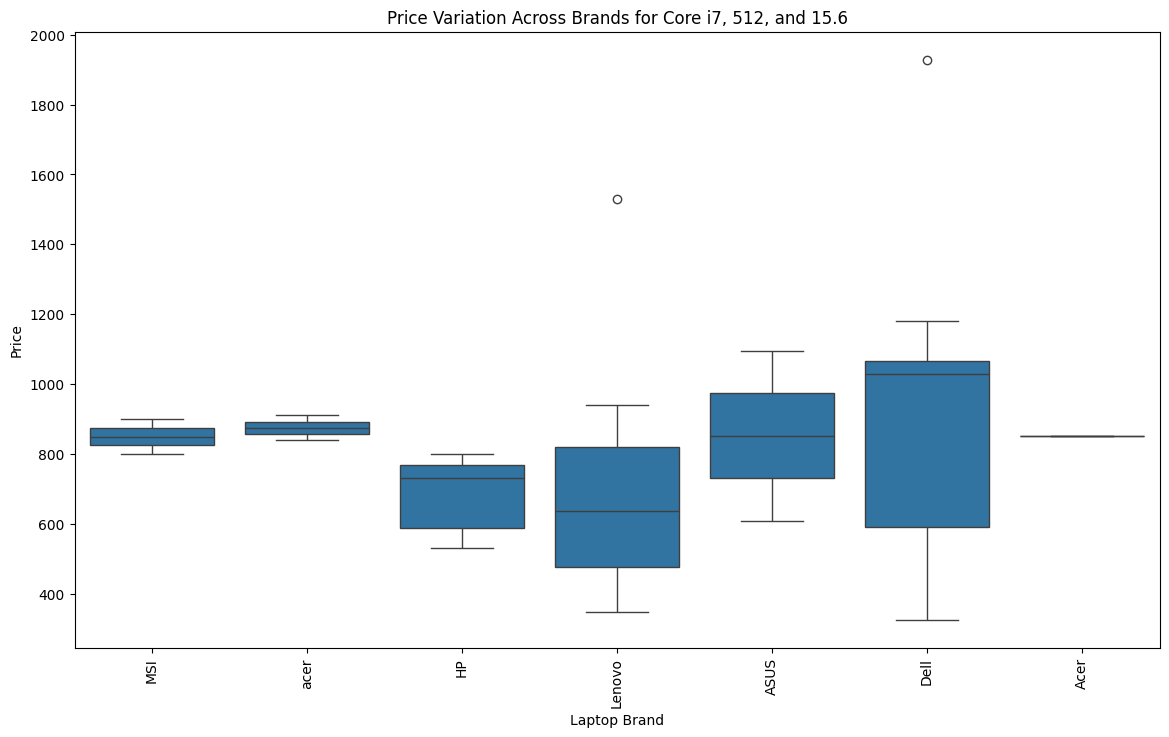

In [314]:
#Laptop Configuration
specific_processor = 'Core i7'  
specific_storage = '512'   
specific_screen_size = 15.6  
specific_storage_type = 'SSD'
specific_RAM = 16

filtered_df = filtered_processor_N_brandDF[
    (filtered_processor_df['Processor'] == specific_processor) & 
    (filtered_processor_df['Storage'] == specific_storage) & 
    (filtered_processor_df['Screen_Size'] == specific_screen_size) & 
    (filtered_processor_df['Storage_Type'] == specific_storage_type) & 
    (filtered_processor_df['RAM'] == specific_RAM)
]
plt.figure(figsize=(14, 8))
sns.boxplot(data=filtered_df, x='Laptop_Brand', y='Price')
plt.title(f'Price Variation Across Brands for {specific_processor}, {specific_storage}, and {specific_screen_size}')
plt.xticks(rotation=90)
plt.ylabel('Price')
plt.xlabel('Laptop Brand')

plt.show()

In [315]:
most_frequent_config = (sdf.groupby(['RAM', 'Storage', 'Storage_Type', 'Processor'])
                        .size()
                        .reset_index(name='Count'))

most_frequent_config_sorted = most_frequent_config.sort_values(by='Count', ascending=False)

top_configuration = most_frequent_config_sorted.head(1)

print("Most Frequent Configuration:")
print(top_configuration)

Most Frequent Configuration:
     RAM Storage Storage_Type Processor  Count
668   16     512          SSD   Core i5    476


In [316]:
most_common_highest_rating = (
    sdf.groupby(['RAM', 'Storage', 'Storage_Type', 'Processor'])
    .agg(Count=('Rating', 'size'), Max_Rating=('Rating', 'max')) 
    .reset_index()
)

most_common_highest_rating_sorted = most_common_highest_rating.sort_values(by=['Count', 'Max_Rating'], ascending=False)

top_configuration_highest_rating = most_common_highest_rating_sorted.head(1)

print("Most Common Configuration with Highest Rating:")
print(top_configuration_highest_rating)

Most Common Configuration with Highest Rating:
     RAM Storage Storage_Type Processor  Count  Max_Rating
668   16     512          SSD   Core i5    476         5.0


In [317]:
highest_rating_most_reviews = (
    sdf.groupby(['RAM', 'Storage', 'Storage_Type', 'Processor'])
    .agg(Count=('Number_of_Reviews', 'sum'), Max_Rating=('Rating', 'max')) 
    .reset_index()
)

highest_rating_most_reviews_sorted = highest_rating_most_reviews.sort_values(by=['Max_Rating', 'Count'], ascending=False)

top_configuration_highest_rating_reviews = highest_rating_most_reviews_sorted.head(1)

print("Configuration with Highest Rating and Most Reviews:")
print(top_configuration_highest_rating_reviews)

Configuration with Highest Rating and Most Reviews:
     RAM Storage Storage_Type Processor   Count  Max_Rating
249    8     512          SSD   Core i3  103489         5.0


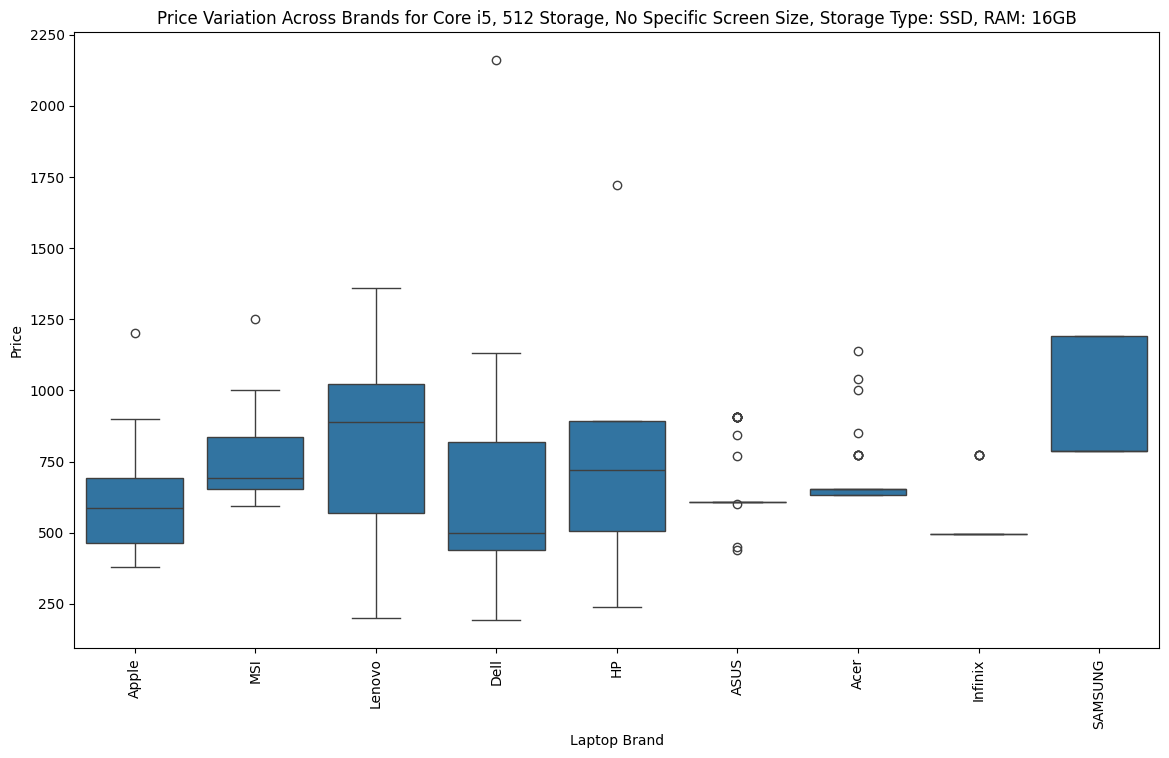

In [318]:
# Helper function to plot graph of specific Laptop specs.
def plot_price_variation(filtered_processor_df, 
                         specific_processor=None, 
                         specific_storage=None, 
                         specific_screen_size=None,  
                         specific_storage_type=None, 
                         specific_RAM=None):

    filtered_df = filtered_processor_df

    if specific_processor:
        filtered_df = filtered_df[filtered_df['Processor'] == specific_processor]
    if specific_storage:
        filtered_df = filtered_df[filtered_df['Storage'] == specific_storage]
    if specific_screen_size:
        filtered_df = filtered_df[filtered_df['Screen_Size'] == specific_screen_size]
    if specific_storage_type:
        filtered_df = filtered_df[filtered_df['Storage_Type'] == specific_storage_type]
    if specific_RAM:
        filtered_df = filtered_df[filtered_df['RAM'] == specific_RAM]

    # Plotting the graph
    plt.figure(figsize=(14, 8))
    sns.boxplot(data=filtered_df, x='Laptop_Brand', y='Price')
    plt.title(f'Price Variation Across Brands for {specific_processor}, {specific_storage} Storage, '
              f'{"Screen Size: " + str(specific_screen_size) if specific_screen_size else "No Specific Screen Size"}, '
              f'Storage Type: {specific_storage_type}, RAM: {specific_RAM}GB')
    plt.xticks(rotation=90)
    plt.ylabel('Price')
    plt.xlabel('Laptop Brand')

    plt.show()

#Most Common and highest rated configuration
plot_price_variation(
    filtered_processor_N_brandDF,
    specific_processor='Core i5',
    specific_storage='512',
    specific_screen_size=None, 
    specific_storage_type='SSD',
    specific_RAM=16
)

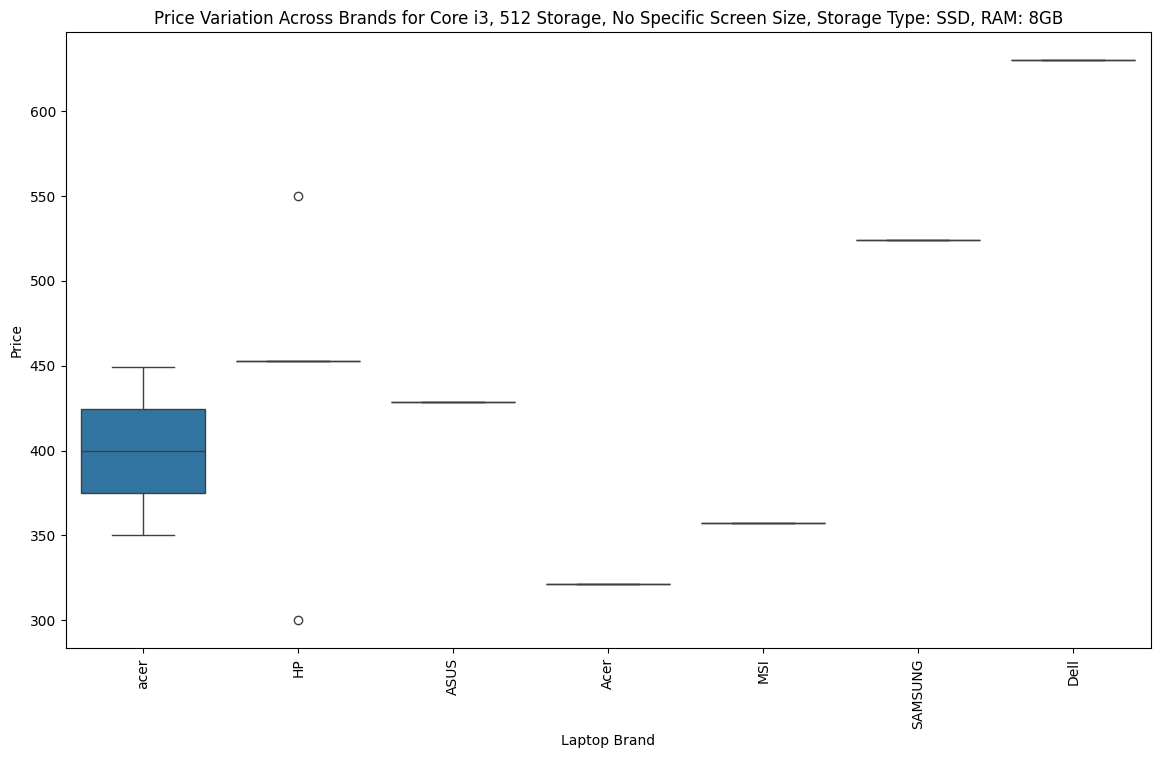

In [319]:
# Configuration with Highest Rating and Most Reviews
plot_price_variation(
    filtered_processor_N_brandDF,
    specific_processor='Core i3',
    specific_storage='512',
    specific_screen_size=None, 
    specific_storage_type='SSD',
    specific_RAM=8
)

#### Conclusion
There seems to be no clear trend per brand, since different configurations have varying prices.

### Question
- **What are the major types of Storage? How does a product's prices and ratings vary with different types of storages?**

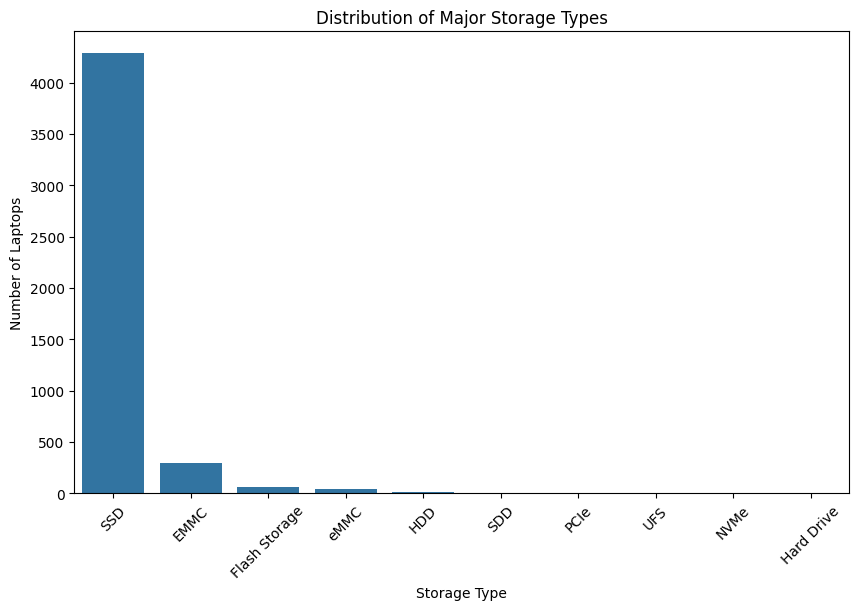

In [320]:
storage_counts = sdf['Storage_Type'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=storage_counts.index, y=storage_counts.values)
plt.title('Distribution of Major Storage Types')
plt.xlabel('Storage Type')
plt.ylabel('Number of Laptops')
plt.xticks(rotation=45)
plt.show()

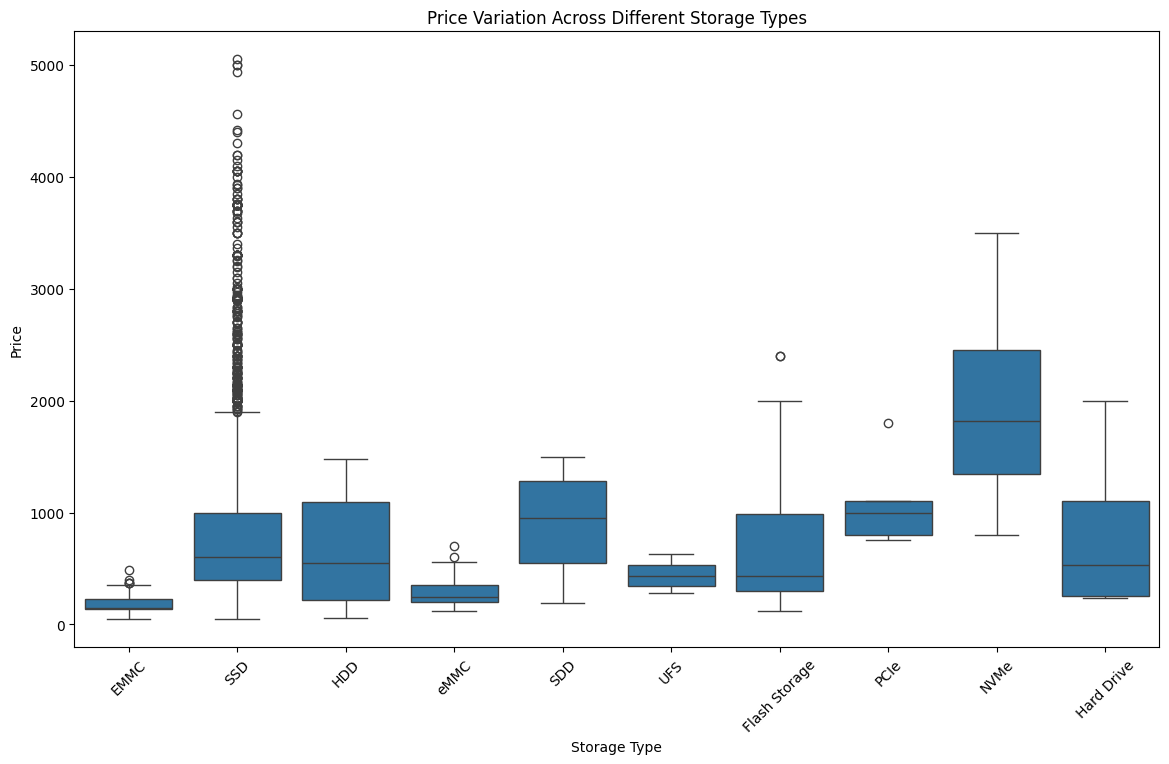

In [321]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=sdf, x='Storage_Type', y='Price')
plt.title('Price Variation Across Different Storage Types')
plt.xlabel('Storage Type')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

In [322]:
price_summary = sdf.groupby('Storage_Type')['Price'].describe().T

print(price_summary)

Storage_Type        EMMC  Flash Storage          HDD  Hard Drive         NVMe  \
count         292.000000      63.000000    11.000000     4.00000     4.000000   
mean          174.729863     689.863492   682.768182   824.99000  1982.490000   
std            66.496060     576.791620   539.409623   825.16665  1143.047826   
min            44.790000     119.990000    59.530000   239.99000   799.990000   
25%           142.790000     299.990000   219.990000   254.99000  1347.490000   
50%           149.000000     429.990000   550.000000   529.99000  1814.990000   
75%           229.000000     984.990000  1097.495000  1099.99000  2449.990000   
max           483.990000    2399.990000  1475.990000  1999.99000  3499.990000   

Storage_Type         PCIe          SDD          SSD         UFS        eMMC  
count            5.000000     6.000000  4283.000000    4.000000   43.000000  
mean          1090.190000   899.156667   834.301961  444.247500  288.249070  
std            421.699182   513.4434

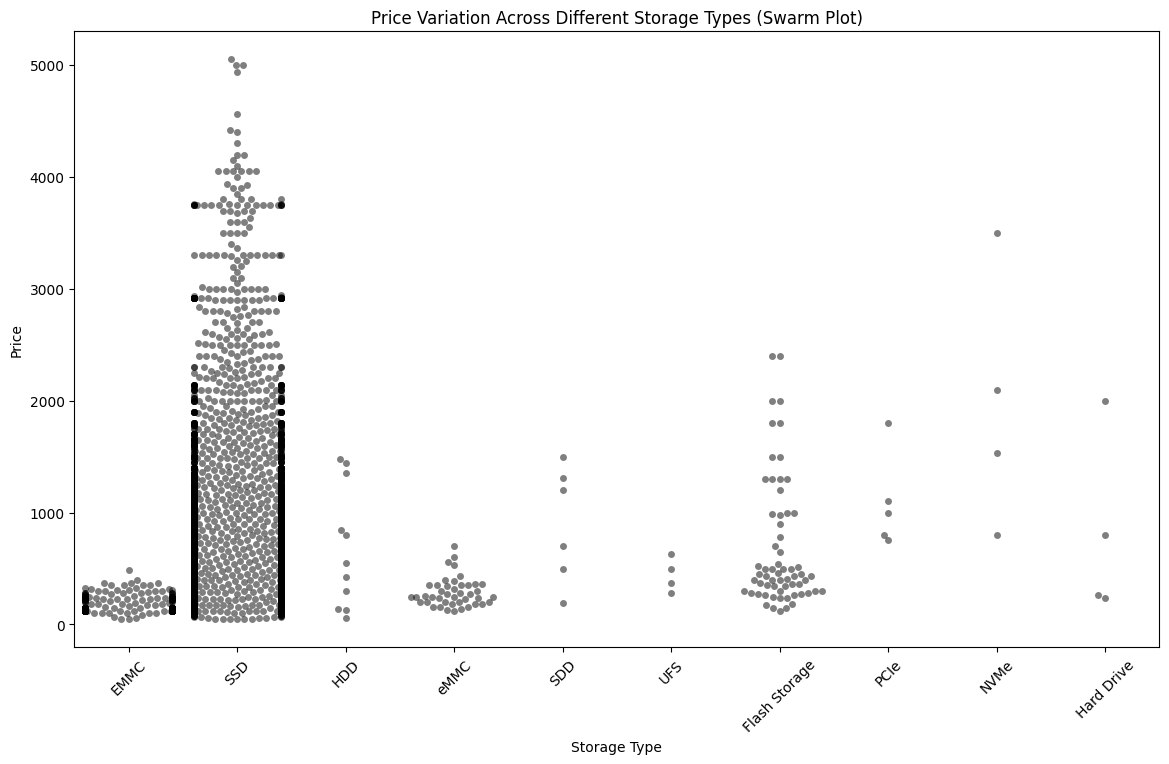

In [323]:
plt.figure(figsize=(14, 8))
sns.swarmplot(data=sdf, x='Storage_Type', y='Price', color='black', alpha=0.5)
plt.title('Price Variation Across Different Storage Types (Swarm Plot)')
plt.xlabel('Storage Type')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

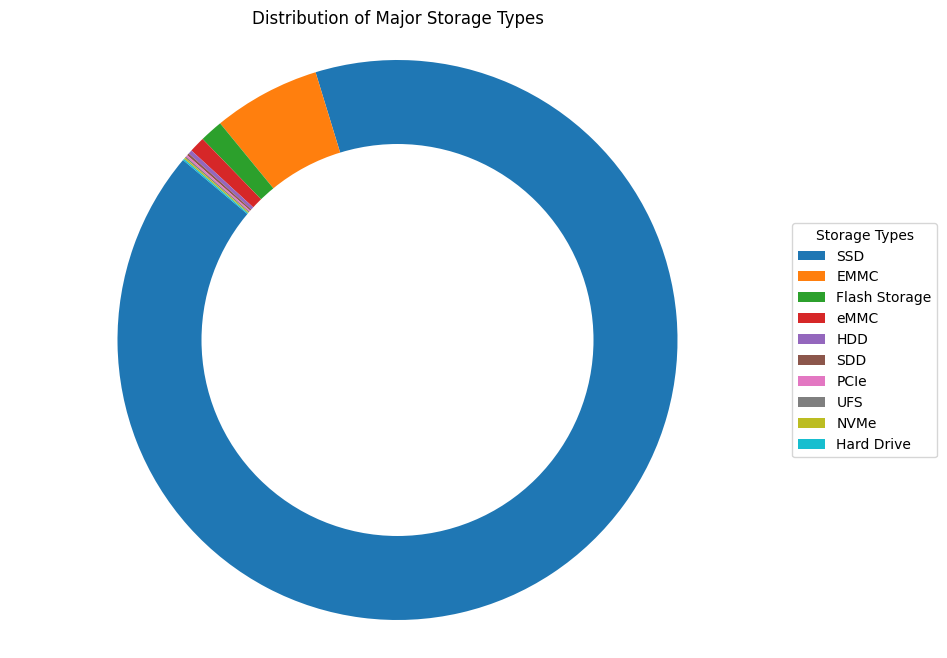

In [325]:
storage_counts = sdf['Storage_Type'].value_counts()

plt.figure(figsize=(10, 8))
wedges, texts = plt.pie(
    storage_counts,
    labels=None,  
    startangle=140,  
    labeldistance=1.2 
)

centre_circle = plt.Circle((0, 0), 0.70, fc='white')  
fig = plt.gcf()  
fig.gca().add_artist(centre_circle) 

plt.legend(wedges, storage_counts.index, title='Storage Types', loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))

plt.title('Distribution of Major Storage Types')
plt.axis('equal') 
plt.show()

#### Observeation
SSD has clearly the highest share in the market as it is the most frequently used Storage Types.

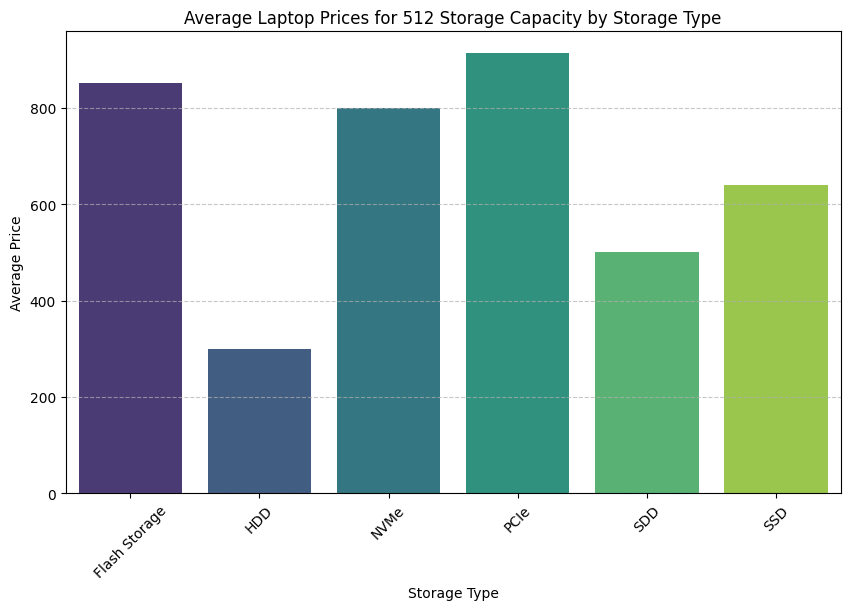

In [327]:
specific_storage = '512'

filtered_storage_df = sdf[sdf['Storage'] == specific_storage]

average_price_by_storage = (
    filtered_storage_df.groupby('Storage_Type')['Price']
    .mean()
    .reset_index()
)

plt.figure(figsize=(10, 6))
sns.barplot(data=average_price_by_storage, x='Storage_Type', y='Price', palette='viridis')

plt.title(f'Average Laptop Prices for {specific_storage} Storage Capacity by Storage Type')
plt.ylabel('Average Price')
plt.xlabel('Storage Type')
plt.xticks(rotation=45)  
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

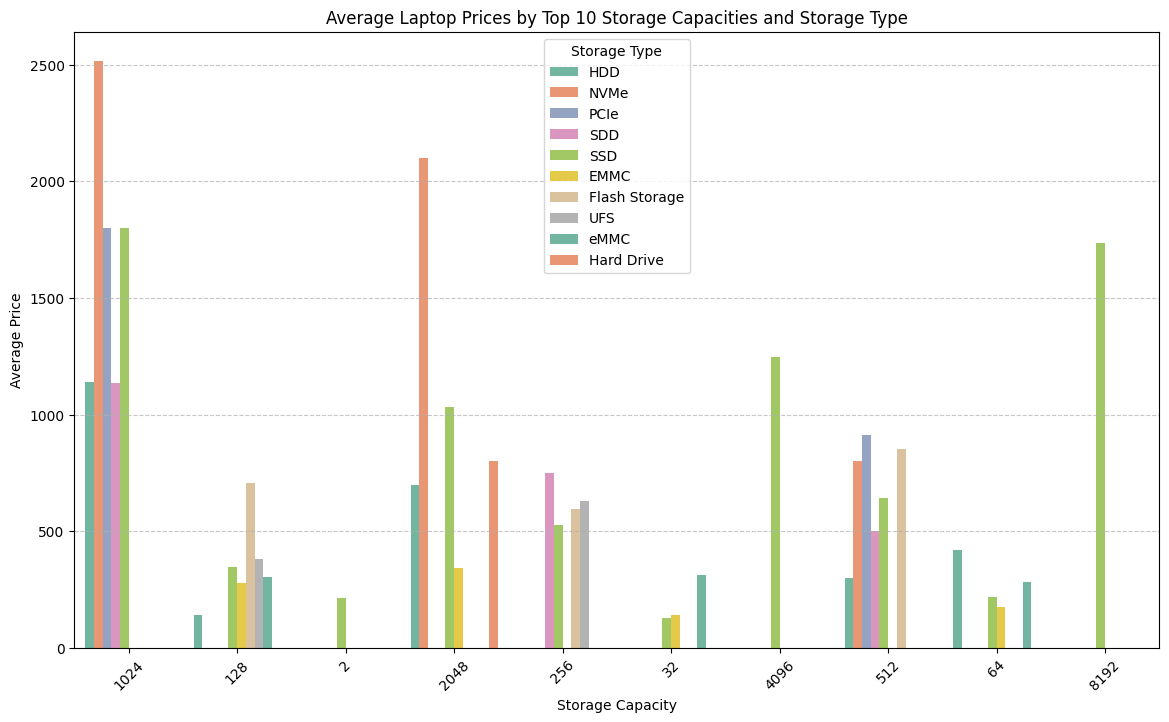

In [328]:
top_storage_sizes = sdf['Storage'].value_counts().head(10).index.tolist()

filtered_storage_df = sdf[sdf['Storage'].isin(top_storage_sizes)]

average_price_by_storage = (
    filtered_storage_df.groupby(['Storage', 'Storage_Type'])['Price']
    .mean()
    .reset_index()
)

plt.figure(figsize=(14, 8))
sns.barplot(data=average_price_by_storage, 
            x='Storage', 
            y='Price', 
            hue='Storage_Type', 
            palette='Set2')

plt.title('Average Laptop Prices by Top 10 Storage Capacities and Storage Type')
plt.ylabel('Average Price')
plt.xlabel('Storage Capacity')
plt.xticks(rotation=45) 
plt.legend(title='Storage Type')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

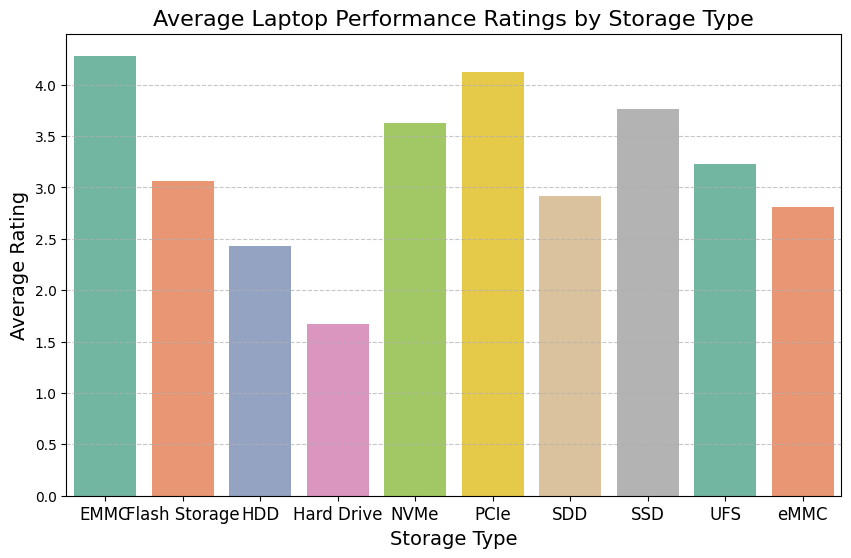

In [329]:
average_rating_by_storage = (
    sdf.groupby('Storage_Type')['Rating']
    .mean()
    .reset_index()
)

plt.figure(figsize=(10, 6))
sns.barplot(data=average_rating_by_storage, 
            x='Storage_Type', 
            y='Rating', 
            palette='Set2') 

plt.title('Average Laptop Performance Ratings by Storage Type', fontsize=16)
plt.ylabel('Average Rating', fontsize=14)
plt.xlabel('Storage Type', fontsize=14)
plt.xticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

#### Observation
Users seem to like the faster speeds of storage since NVMe and SSD have an average rating > 3.5.

Do laptops with faster storage (like NVMe SSDs) command a higher price compared to those with standard SSDs?

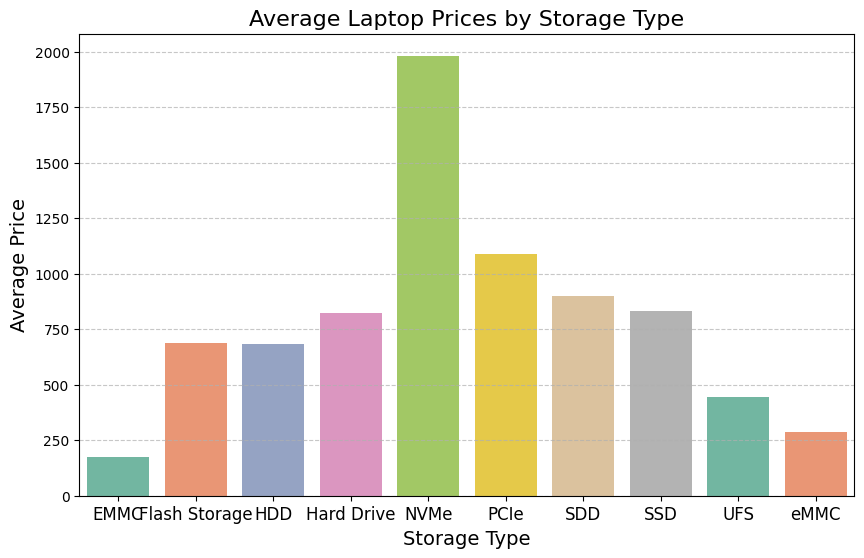

In [330]:
average_price_by_storage_type = (
    sdf.groupby('Storage_Type')['Price']
    .mean()
    .reset_index()
)

plt.figure(figsize=(10, 6))
sns.barplot(data=average_price_by_storage_type, 
            x='Storage_Type', 
            y='Price', 
            palette='Set2') 

plt.title('Average Laptop Prices by Storage Type', fontsize=16)
plt.ylabel('Average Price', fontsize=14)
plt.xlabel('Storage Type', fontsize=14)
plt.xticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

#### Conclusion
We can see here that NVMe has a higher average price than it's competitor.

# References
1. 